In [1]:
from nltk.stem.wordnet import WordNetLemmatizer
import pandas as pd
import numpy as np
import string
from gensim import corpora
import gensim
from nltk.corpus import words
from gensim.models import LdaModel, LsiModel, Word2Vec, CoherenceModel
from gensim.corpora import Dictionary
import pyLDAvis.gensim
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.decomposition import PCA
from collections import defaultdict
from spacy.lang.en import STOP_WORDS
from pprint import pprint

In [2]:
# stop words
stop_wrd = []
with open('stopword.txt') as f:
    for c in f:
        c = c.replace(",","").replace("\n","").replace('"',"").strip()
        stop_wrd.append(c)
stop = list(STOP_WORDS)
print(len(stop))

305


# <div class="alert alert-block alert-info"><font color='red'> Non-Anonymous User (Negative Comments) <font>  </div>

In [3]:
doc_complete = []
with open('verified_negativecomment.txt') as f:
    for l in f:
        doc_complete.append(l)   

In [4]:
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    stop_free = " ".join([i for i in punc_free.split() if i not in stop_wrd])
    stop_free = ' '.join(i for i in stop_free.split() if not i.startswith('u0'))
    #stop_free = ' '.join(i for i in stop_free.split() if len(i)>3)
    stop_free = " ".join([i for i in stop_free.lower().split() if not unicode(i, 'utf-8').isnumeric()])
    normalized = " ".join(lemma.lemmatize(word) for word in stop_free.split())
    return normalized
doc_clean = [clean(doc).split() for doc in doc_complete]
print(doc_clean[:5])

[[u'let', u'victimize', u'raped', u'impregnated', u'woman', u'girl', u'fun', u'food', u'stamp', u'find', u'broke', u'raise', u'child', u'forced', u'rapist', u'sociopath', u'john'], [u'tennessee', u'state', u'ratify', u'19th', u'amendment', u'state', u'gave', u'scope', u'monkey', u'trial', u'stupid', u'obesity', u'consequence'], ['roe', 'wade', 'settled', 'law', 'tn', 'state', 'allowed', 'interfere', 'matter', 'woman', 'doctor', 'chooses', 'minister', 'rabbi'], [u'good', u'post', u'ben', u'hit', u'head', u'money', u'politics', u'game', u'witnessing', u'prime', u'resolve', u'issue', u'take', u'turn', u'worst'], [u'republican', u'righteous', u'greedy', u'ignore', u'truth', u'stop', u'clown', u'destroying', u'environmentvote']]


In [5]:
# frequency calculation of token in all documents
frequency = defaultdict(int)
for text in doc_clean:
    for token in text:
        frequency[token] += 1

In [6]:
print frequency['good']

3059


In [7]:
# make new text data by removing out the token that have occurence less then 2
minimum_freq = 1
len_of_token = 2
# doc_clean = [[token for token in text if frequency[token] > minimum_freq]
#           for text in doc_clean]
doc_clean = [[token for token in text if len(token) > len_of_token and frequency[token] > minimum_freq]
          for text in doc_clean]
# print doc_clean1[17]

In [8]:
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [9]:
corpus = [dictionary.doc2bow(doc) for doc in doc_clean]

In [10]:
word_frequency = [[(dictionary[id], freq) for id, freq in cp] for cp in corpus]

In [ ]:
# word_frequency_df = pd.DataFrame(columns=['words','frequency'])
# for x in range(len(word_frequency)):
#     xyz =  pd.DataFrame(word_frequency[x],columns=['words','frequency'])
#     #xyz['article_no'] = x+1
#     word_frequency_df = word_frequency_df.append(xyz,ignore_index=True)

In [ ]:
# word_frequency_df

In [11]:
Lda = gensim.models.ldamulticore.LdaMulticore
ldamodel = Lda(doc_term_matrix, num_topics=200, id2word = dictionary, passes=20)

/home/ubuntu/.virtualenvs/nlp/local/lib/python2.7/site-packages/gensim/models/ldamodel.py:775: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


In [ ]:
#def evaluate_graph(dictionary, corpus, texts, limit):
#    """
#    Function to display num_topics - LDA graph using c_v coherence
    
#    Parameters:
#    ----------
#    dictionary : Gensim dictionary
#    corpus : Gensim corpus
#    limit : topic limit
    
#    Returns:
#    -------
 #   lm_list : List of LDA topic models
 #   """
#    c_v = []
#    lm_list = []
#    for num_topics in range(1, limit):
#        lm = gensim.models.ldamulticore.LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary)
#        lm_list.append(lm)
#        cm = CoherenceModel(model=lm, texts=texts, dictionary=dictionary, coherence='c_v')
#        c_v.append(cm.get_coherence())
#        print "Coherence of model with number of topic = %s is %s"%(num_topics,cm.get_coherence())

    # Show graph
#    x = range(1, limit)
#    plt.plot(x, c_v)
#    plt.xlabel("num_topics")
#    plt.ylabel("Coherence score")
#    plt.legend(("c_v"), loc='best')
#    plt.show()
    
#    return lm_list

In [ ]:
#lm_list = evaluate_graph(dictionary, corpus, doc_clean, 101)

In [12]:
# Topic Coherence is defined as the average / median of the pairwise word-similarity scores of the words in the topic
# A good model will generate coherent topics, i.e., topics with high topic coherence scores.

top_topics = ldamodel.top_topics(corpus,topn=2)
    # # Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / ldamodel.num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)
pprint(top_topics)



Average topic coherence: -4.8413.
[([(0.103548385, u'suicide'), (0.08312689, u'farmer')], -0.5224875633325241),
 ([(0.13332158, u'senior'), (0.06742025, u'officer')], -0.6322270065057812),
 ([(0.36355382, u'illegal'), (0.25444317, u'easier')], -0.6718491828020499),
 ([(0.17607497, u'british'), (0.053042144, u'india')], -0.6839135041583932),
 ([(0.16550831, u'pakistan'), (0.12765512, u'india')], -0.8161674753732543),
 ([(0.14256291, u'waste'), (0.07277174, u'time')], -0.9069448691683524),
 ([(0.160778, u'religious'), (0.13024724, u'study')], -0.9517769301448609),
 ([(0.24040969, u'policy'), (0.21311976, u'society')], -1.2102033538423809),
 ([(0.09569625, u'destroy'), (0.06891489, u'india')], -1.2755429963285871),
 ([(0.35769448, u'poor'), (0.08098733, u'people')], -1.289889071739624),
 ([(0.2897568, u'stupid'), (0.039681822, u'people')], -1.3024877480769428),
 ([(0.19607341, u'crore'), (0.092128254, u'pension')], -1.3429783167441733),
 ([(0.09761699, u'useless'), (0.029945182, u'india')

In [ ]:
#x = range(1, limit)
 #   plt.plot(x, avg_topic_coherence)
  #  plt.xlabel("num_topics")
   # plt.ylabel("Coherence score")
   # plt.legend(("c_v"), loc='best')
   # plt.show()
#return top_topics

In [ ]:
#top_topics = evaluate_graph(dictionary, corpus, top_topics, 10)


# LDA Model -- Based on Probabilistic Graphical Models 

<div class="alert alert-block alert-info"> <font color='Blue'> Interpreting pyLDAvis output:
<ul> <li>Bubbles on the left-hand side of plot represents a topic. Larger the bubble, the more prevalent is that topic. </li>
<li>Good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant. </li>
<li>Model with too many topics, will have many overlaps, small sized bubbles are clustered in one region of the chart.</li>
<li>The words on the right-hand side are the salient keywords that form the selected topic.</li>
<li>The red bars represent the frequency of a term in a given topic, and the blue bars represent term's frequency across the entire corpus.</li> </ul></font> </div>

In [13]:
print(ldamodel.print_topics(num_topics=20))

[(130, u'0.231*"comment" + 0.069*"check" + 0.048*"mental" + 0.048*"list" + 0.029*"hey" + 0.022*"unit" + 0.022*"stick" + 0.019*"porki" + 0.015*"range" + 0.012*"approved"'), (42, u'0.082*"dumb" + 0.080*"parliament" + 0.070*"crazy" + 0.062*"loose" + 0.037*"monsoon" + 0.029*"raising" + 0.025*"session" + 0.025*"dealing" + 0.021*"drought" + 0.019*"government"'), (166, u'0.053*"month" + 0.053*"strategy" + 0.028*"trading" + 0.028*"chidambaram" + 0.024*"eliminated" + 0.024*"cable" + 0.024*"stronger" + 0.023*"sharing" + 0.022*"denial" + 0.015*"time"'), (181, u'0.120*"price" + 0.067*"market" + 0.054*"product" + 0.054*"oil" + 0.050*"cost" + 0.042*"increase" + 0.035*"quality" + 0.024*"crude" + 0.021*"profit" + 0.018*"reduce"'), (179, u'0.113*"clear" + 0.089*"play" + 0.065*"angry" + 0.061*"carry" + 0.049*"king" + 0.048*"pak" + 0.034*"photo" + 0.029*"petrol" + 0.027*"sharma" + 0.027*"obvious"'), (31, u'0.109*"greece" + 0.057*"debt" + 0.045*"greek" + 0.025*"euro" + 0.019*"yemen" + 0.019*"weak" + 0.018

In [14]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)

/home/ubuntu/.virtualenvs/nlp/local/lib/python2.7/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=           Freq  cluster  topics         x         y
topic                                               
145    1.270125        1       1 -0.002512 -0.073472
125    1.220235        1       2  0.168191  0.046503
40     1.136352        1       3  0.080296 -0.040981
3      1.129012        1       4  0.167929 -0.177007
139    1.066999        1       5  0.096256  0.003587
167    1.060217        1       6  0.201694 -0.065124
181    1.039239        1       7  0.081796  0.022796
76     0.997598        1       8  0.097668  0.050625
197    0.929344        1       9  0.101824 -0.133605
146    0.898201        1      10  0.110152 -0.074219
32     0.886622        1      11  0.086484 -0.044984
136    0.854275        1      12  0.050949  0.065286
11     0.826141        1      13  0.051610 -0.115051
102    0.821215        1      14  0.153592  0.042798
50     0.804482        1      15  0.087769  0.003451
18     0.758353        1      16  0.027193  0.092428
55     0.753270        1      17 -0.074123 -0.003795
109    0.735653        1      18  0.041423 -0.038765
9      0.730041        1      19  0.068032 -0.070479
97     0.726750        1      20 -0.053691  0.044263
39     0.721017        1      21 -0.007548  0.065797
4      0.719654        1      22 -0.062107 -0.044496
60     0.715407        1      23  0.052403  0.031116
12     0.706505        1      24  0.049359  0.061068
135    0.703421        1      25  0.101341  0.066245
23     0.682171        1      26 -0.068217  0.005088
51     0.681206        1      27  0.043253  0.083095
177    0.680086        1      28  0.006957 -0.148466
0      0.664946        1      29  0.036722  0.058271
127    0.661828        1      30  0.033520  0.028902
...         ...      ...     ...       ...       ...
140    0.336054        1     171 -0.083389 -0.013605
6      0.335001        1     172 -0.032530 -0.053472
105    0.330766        1     173  0.025867  0.047522
124    0.330684        1     174 -0.145209 -0.030806
129    0.328699        1     175  0.059406  0.061624
134    0.323918        1     176 -0.024134 -0.071383
159    0.322934        1     177  0.028590  0.031363
191    0.321537        1     178 -0.021184 -0.002308
1      0.321270        1     179  0.009420  0.022294
7      0.320393        1     180 -0.043085 -0.007578
120    0.316827        1     181 -0.036586  0.064146
77     0.312939        1     182  0.046525 -0.014138
101    0.312746        1     183 -0.139182 -0.028576
107    0.309577        1     184 -0.055056 -0.047416
186    0.305394        1     185 -0.034046  0.036576
46     0.305240        1     186  0.034852  0.045238
63     0.298394        1     187 -0.071159  0.001572
114    0.294143        1     188 -0.096644  0.010445
174    0.293762        1     189 -0.071386  0.024681
67     0.292180        1     190 -0.108643 -0.009115
171    0.290945        1     191 -0.018617 -0.016121
30     0.285590        1     192 -0.012180  0.012398
28     0.284867        1     193 -0.136593 -0.023215
19     0.278461        1     194  0.039115 -0.034079
153    0.276679        1     195 -0.040472  0.005351
2      0.265585        1     196 -0.059253  0.025544
100    0.252054        1     197 -0.025881  0.017441
24     0.251454        1     198 -0.058269 -0.004178
144    0.250671        1     199 -0.025965  0.031201
166    0.245487        1     200 -0.007854  0.070266

[200 rows x 5 columns], topic_info=       Category          Freq           Term         Total  loglift  logprob
term                                                                        
29039   Default   8134.000000          money   8134.000000  30.0000  30.0000
17179   Default   6560.000000           govt   6560.000000  29.0000  29.0000
5266    Default   7007.000000          party   7007.000000  28.0000  28.0000
158     Default   5958.000000          wrong   5958.000000  27.0000  27.0000
4082    Default   6199.000000           poor   6199.000000  26.0000  26.0000
39373   Default   5795.000000            bad   5795.000

# LSI Model - (Latent Semantic Analysis) 

<div class="alert alert-block alert-info"><font color = 'blue'>Learns latent topics by performing matrix decomposition (SVD) on the term-document matrix
LSI finds low-dimension representation of documents and words.
Faster to train than LDA, but has lower accuracy. </font> </div>

In [15]:
model = LsiModel(doc_term_matrix, id2word=dictionary,num_topics=20)  # train model

In [16]:
for c in model.print_topics(100):
     print c

(0, u'0.492*"india" + 0.352*"people" + 0.250*"indian" + 0.209*"country" + 0.187*"year" + 0.160*"government" + 0.149*"time" + 0.137*"money" + 0.106*"govt" + 0.105*"party"')
(1, u'-0.665*"india" + 0.357*"people" + 0.328*"ignore" + 0.164*"gujarat" + 0.121*"marriage" + 0.116*"development" + 0.114*"modiu2019s" + 0.104*"government" + 0.102*"life" + -0.099*"pakistan"')
(2, u'-0.395*"ignore" + -0.339*"indian" + 0.337*"people" + -0.280*"india" + -0.202*"gujarat" + 0.150*"money" + -0.147*"marriage" + 0.147*"country" + -0.136*"development" + -0.135*"modiu2019s"')
(3, u'-0.600*"people" + 0.276*"applicant" + 0.241*"plot" + 0.219*"land" + 0.188*"dda" + 0.175*"money" + 0.171*"time" + 0.170*"delhi" + 0.140*"scheme" + 0.133*"corrupt"')
(4, u'0.526*"british" + 0.351*"japan" + 0.315*"indian" + -0.270*"india" + -0.215*"people" + 0.131*"japanese" + 0.129*"country" + 0.123*"war" + -0.120*"applicant" + 0.111*"muslim"')
(5, u'0.621*"indian" + -0.414*"british" + -0.288*"japan" + -0.213*"india" + 0.166*"men" + 

# Heat map 
<div class="alert alert-block alert-info"><font color = 'blue'> Strength of color bar represents normalized ratio of how often a topic X is mentioned in Document Y </font> </div>

In [17]:
K = model.num_topics
columns = []
columns_dict = {}
for k in range(1,K+1):
    columns.append(str(k))
    columns_dict[k-1] = ""

In [18]:
df = pd.DataFrame(columns = columns)
pd.set_option('display.width', 1000)
zz = np.zeros(shape=(1000,K))
last_number=0
DC={}
for x in range (10):
  data = pd.DataFrame(columns_dict,index=[0])
  df=df.append(data,ignore_index=True)  
for line in model.print_topics(num_topics=K):
    tp, w = line
    #print tp
    probs=w.split("+")
    y=0
    for pr in probs:
        a=pr.split("*")
        df.iloc[y,tp] = a[1]       
        if a[1] in DC:
           zz[DC[a[1]]][tp]=a[0]
        else:
           zz[last_number][tp]=a[0]
           DC[a[1]]=last_number
           last_number=last_number+1
        y=y+1

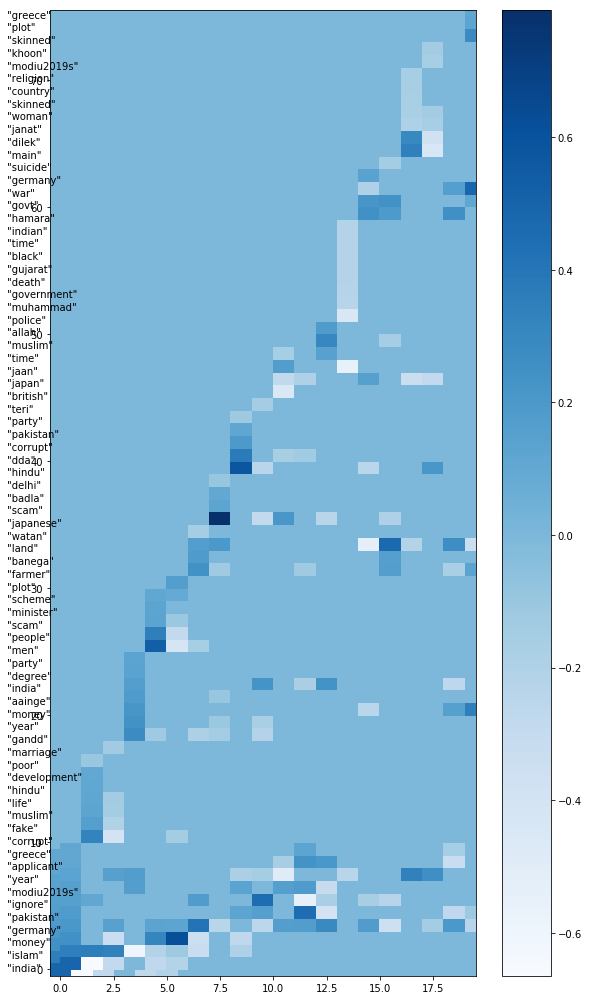

In [19]:
zz=np.resize(zz,(len(DC.keys()),zz.shape[1]))
plt.figure(figsize = (8,14))
plt.pcolor(zz,norm=None, cmap='Blues')
plt.colorbar(cmap='Blues')
plt.imshow(zz, cmap='Blues', interpolation='nearest',aspect='auto')
for val, key in enumerate(DC.keys()):
        plt.text(-2.5, val + 0.5, key,
                 horizontalalignment='left',
                 verticalalignment='top'
                 )
plt.gca().invert_yaxis()      # flip the y-axis so the texts are in the order
plt.tight_layout()            # fixes margins
plt.show()

In [20]:
def topics_to_vectorspace(n_topics, n_words=100):
    rows = []
    for i in xrange(n_topics):
        temp = model.show_topic(i, n_words)
        row = dict(((j[1],j[0]) for j in temp))
        rows.append(row)
    return rows
vec = DictVectorizer()
X = vec.fit_transform(topics_to_vectorspace(K))
X.shape

(20, 1982)

# PCA (Principal Component Analysis) 

<div class="alert alert-block alert-info"><font color = 'blue'> Statistical procedure to convert a set of observations of correlated variables into set of values of linearly uncorrelated variables called principal componets. </font> </div> 

In [ ]:
#pca = PCA(n_components=2)
#X_pca = pca.fit(X.toarray()).transform(X.toarray())
#for i in xrange(X_pca.shape[0]):
#    plt.scatter(X_pca[i, 0], X_pca[i, 1], alpha=.5)
#    plt.text(X_pca[i, 0], X_pca[i, 1], s=' ' + str(i))    
#plt.show()

In [ ]:
# X_pca = pca.fit(X.T.toarray()).transform(X.T.toarray())
# plt.figure(figsize=(20,20)) 
# for i, n in enumerate(vec.get_feature_names()):
#     plt.scatter(X_pca[i, 0], X_pca[i, 1], alpha=.5)
#     plt.text(X_pca[i, 0], X_pca[i, 1], s=' ' + n, fontsize=8)
# plt.show()

/home/ubuntu/.virtualenvs/nlp/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


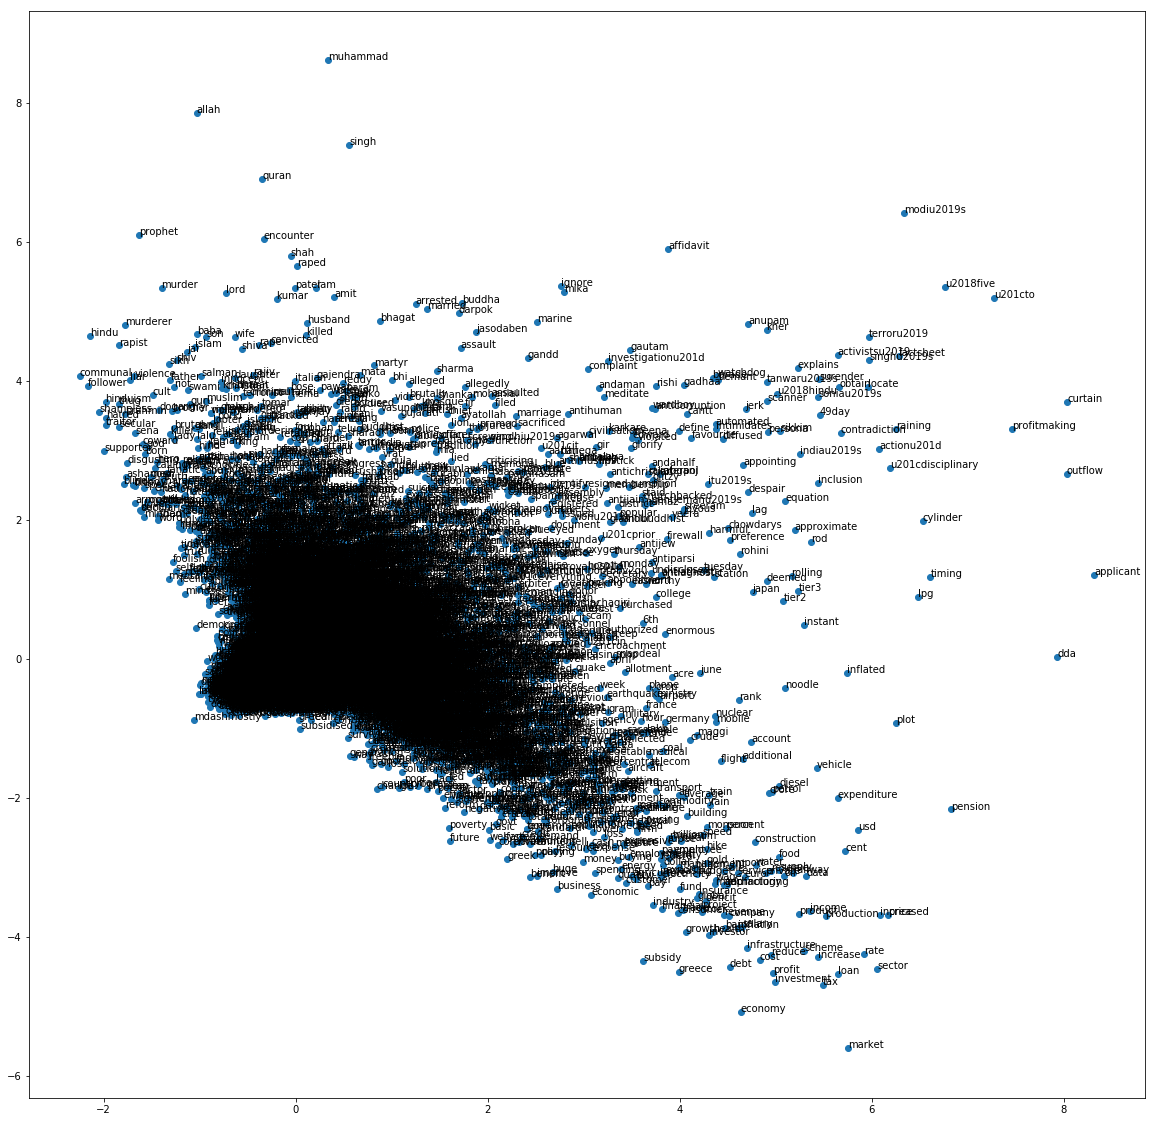

In [21]:
sentences = doc_clean
model = Word2Vec(sentences,workers=3)
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.figure(figsize = (20,20))
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

# <div class="alert alert-block alert-info"><font color='red'> Non-Anonymous User (Positive Comments) <font> </div> #


In [22]:
doc_complete = []
with open('verified_positivecomment.txt') as f:
    for l in f:
        doc_complete.append(l) 

In [23]:
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    stop_free = " ".join([i for i in punc_free.split() if i not in stop_wrd])
    stop_free = ' '.join(i for i in stop_free.split() if not i.startswith('u0'))
    #stop_free = ' '.join(i for i in stop_free.split() if len(i)>3)
    stop_free = " ".join([i for i in stop_free.lower().split() if not unicode(i, 'utf-8').isnumeric()])
    normalized = " ".join(lemma.lemmatize(word) for word in stop_free.split())
    return normalized
doc_clean = [clean(doc).split() for doc in doc_complete]
print(doc_clean[:5])

[['john'], [u'roe', u'wade', u'settled', u'law', u'slavery', u'time', u'attempting', u'ensure', u'abortion', u'clinic', u'licensed', u'regulated', u'woman', u'asked', u'heart', u'wrenching', u'choice', u'hear', u'hand', u'doctor', u'fully', u'informed', u'tanning', u'bed', u'facility', u'licensing', u'regulation', u'abortion', u'clinic', u'state', u'tennessee', u'worried'], [u'woman', u'havent', u'thought', u'decision', u'doctor', u'technically', u'abortion', u'clinic', u'wouldnt', u'woman', u'personal', u'doctor', u'walking', u'doctor', u'theyve', u'met', u'btw', u'lower', u'wrote', u'opinion', u'article', u'waiting', u'periodfor', u'irrational', u'immature', u'people', u'inside', u'clinic', u'speak', u'opinion', u'personally', u'ended', u'horrid', u'infection', u'clinic', u'nashville', u'child', u'narrowminded', u'judge'], [u'sound', u'good', u'bill', u'glad', u'pas'], [u'licensed', u'ambulatory', u'surgical', u'treatment', u'center', u'entail', u'guess', u'good', u'leglislation', u'

In [24]:
# frequency calculation of token in all documents
frequency = defaultdict(int)
for text in doc_clean:
    for token in text:
        frequency[token] += 1

In [25]:
# make new text data by removing out the token that have occurence less then 2
minimum_freq = 1
len_of_token = 2
# doc_clean = [[token for token in text if frequency[token] > minimum_freq]
#           for text in doc_clean]
doc_clean = [[token for token in text if len(token) > len_of_token and frequency[token] > minimum_freq]
          for text in doc_clean]
# print doc_clean1[17]

In [26]:
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# LDA

In [ ]:
Lda = gensim.models.ldamulticore.LdaMulticore
ldamodel = Lda(doc_term_matrix, num_topics=200, id2word = dictionary, passes=20)

In [ ]:
#top_topics = model.top_topics(corpus, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
#avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
#print('Average topic coherence: %.4f.' % avg_topic_coherence)

#from pprint import pprint
#pprint(top_topics)

In [ ]:
print(ldamodel.print_topics(num_topics=20))

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)

# LSI

In [29]:
model = LsiModel(doc_term_matrix, id2word=dictionary,num_topics=20)  # train model

In [30]:
for c in model.print_topics(200):
     print c

(0, u'0.411*"tripura" + 0.309*"india" + 0.238*"agartala" + 0.186*"world" + 0.185*"state" + 0.172*"people" + 0.171*"class" + 0.160*"city" + 0.139*"international" + 0.127*"hour"')
(1, u'0.352*"delhi" + 0.230*"plot" + 0.222*"land" + -0.209*"tripura" + 0.208*"scam" + 0.189*"india" + 0.176*"case" + 0.167*"bribe" + 0.152*"public" + 0.137*"indian"')
(2, u'0.814*"scam" + -0.214*"delhi" + 0.180*"india" + -0.156*"plot" + -0.112*"bribe" + -0.090*"dda" + -0.090*"applicant" + -0.082*"public" + 0.082*"scandal" + -0.071*"tripura"')
(3, u'0.410*"nehru" + 0.408*"award" + 0.407*"rndi" + 0.407*"rndibaaz" + 0.407*"management" + 0.407*"2nd" + -0.018*"tripura" + 0.015*"scam" + -0.010*"agartala" + -0.009*"people"')
(4, u'-0.475*"scam" + 0.426*"india" + 0.196*"people" + -0.183*"tripura" + 0.163*"indian" + -0.158*"delhi" + 0.154*"good" + 0.146*"year" + -0.141*"plot" + 0.134*"government"')
(5, u'0.591*"theu00ac" + -0.282*"india" + 0.220*"bank" + 0.167*"someu00ac" + 0.149*"austria" + 0.141*"billion" + 0.141*"the

# Heat Map

In [31]:
K = model.num_topics
columns = []
columns_dict = {}
for k in range(1,K+1):
    columns.append(str(k))
    columns_dict[k-1] = ""

In [32]:
df = pd.DataFrame(columns = columns)
pd.set_option('display.width', 1000)
zz = np.zeros(shape=(1000,K))
last_number=0
DC={}
for x in range (10):
  data = pd.DataFrame(columns_dict,index=[0])
  df=df.append(data,ignore_index=True)  
for line in model.print_topics(num_topics=K):
    tp, w = line
    #print tp
    probs=w.split("+")
    y=0
    for pr in probs:
        a=pr.split("*")
        df.iloc[y,tp] = a[1]       
        if a[1] in DC:
           zz[DC[a[1]]][tp]=a[0]
        else:
           zz[last_number][tp]=a[0]
           DC[a[1]]=last_number
           last_number=last_number+1
        y=y+1

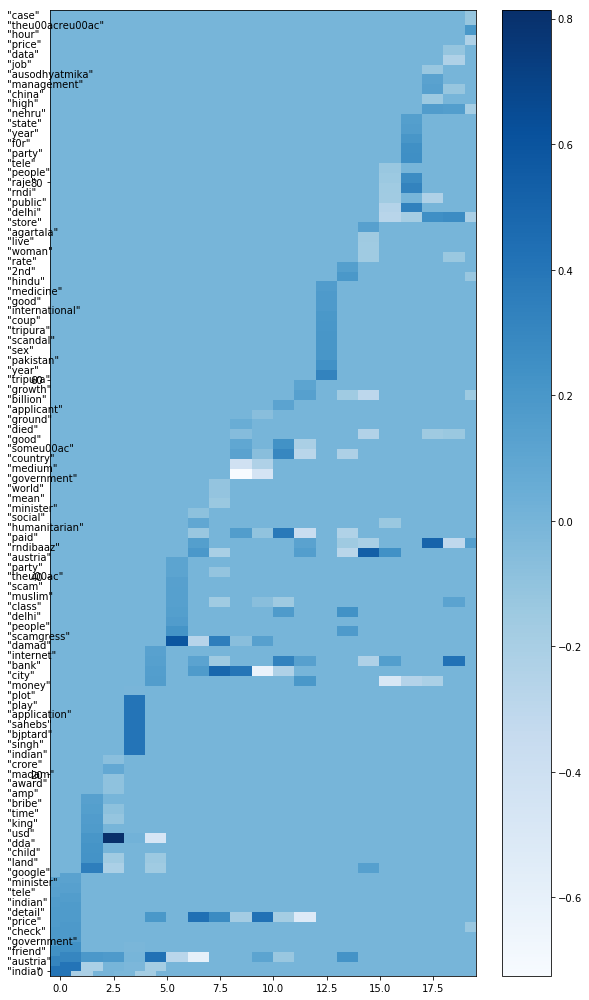

In [33]:
zz=np.resize(zz,(len(DC.keys()),zz.shape[1]))
plt.figure(figsize = (8,14))
plt.pcolor(zz,norm=None, cmap='Blues')
plt.colorbar(cmap='Blues')
plt.imshow(zz, cmap='Blues', interpolation='nearest',aspect='auto')
for val, key in enumerate(DC.keys()):
        plt.text(-2.5, val + 0.5, key,
                 horizontalalignment='left',
                 verticalalignment='top'
                 )
plt.gca().invert_yaxis()      # flip the y-axis so the texts are in the order
plt.tight_layout()            # fixes margins
plt.show()

In [35]:
def topics_to_vectorspace(n_topics, n_words=100):
    rows = []
    for i in xrange(n_topics):
        temp = model.show_topic(i, n_words)
        row = dict(((j[1],j[0]) for j in temp))
        rows.append(row)
    return rows
vec = DictVectorizer()
X = vec.fit_transform(topics_to_vectorspace(K))
X.shape

(20, 1992)

# PCA

In [ ]:
#pca = PCA(n_components=2)
#X_pca = pca.fit(X.toarray()).transform(X.toarray())
#for i in xrange(X_pca.shape[0]):
#    plt.scatter(X_pca[i, 0], X_pca[i, 1], alpha=.5)
#    plt.text(X_pca[i, 0], X_pca[i, 1], s=' ' + str(i))    
#plt.show()

/home/ubuntu/.virtualenvs/nlp/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


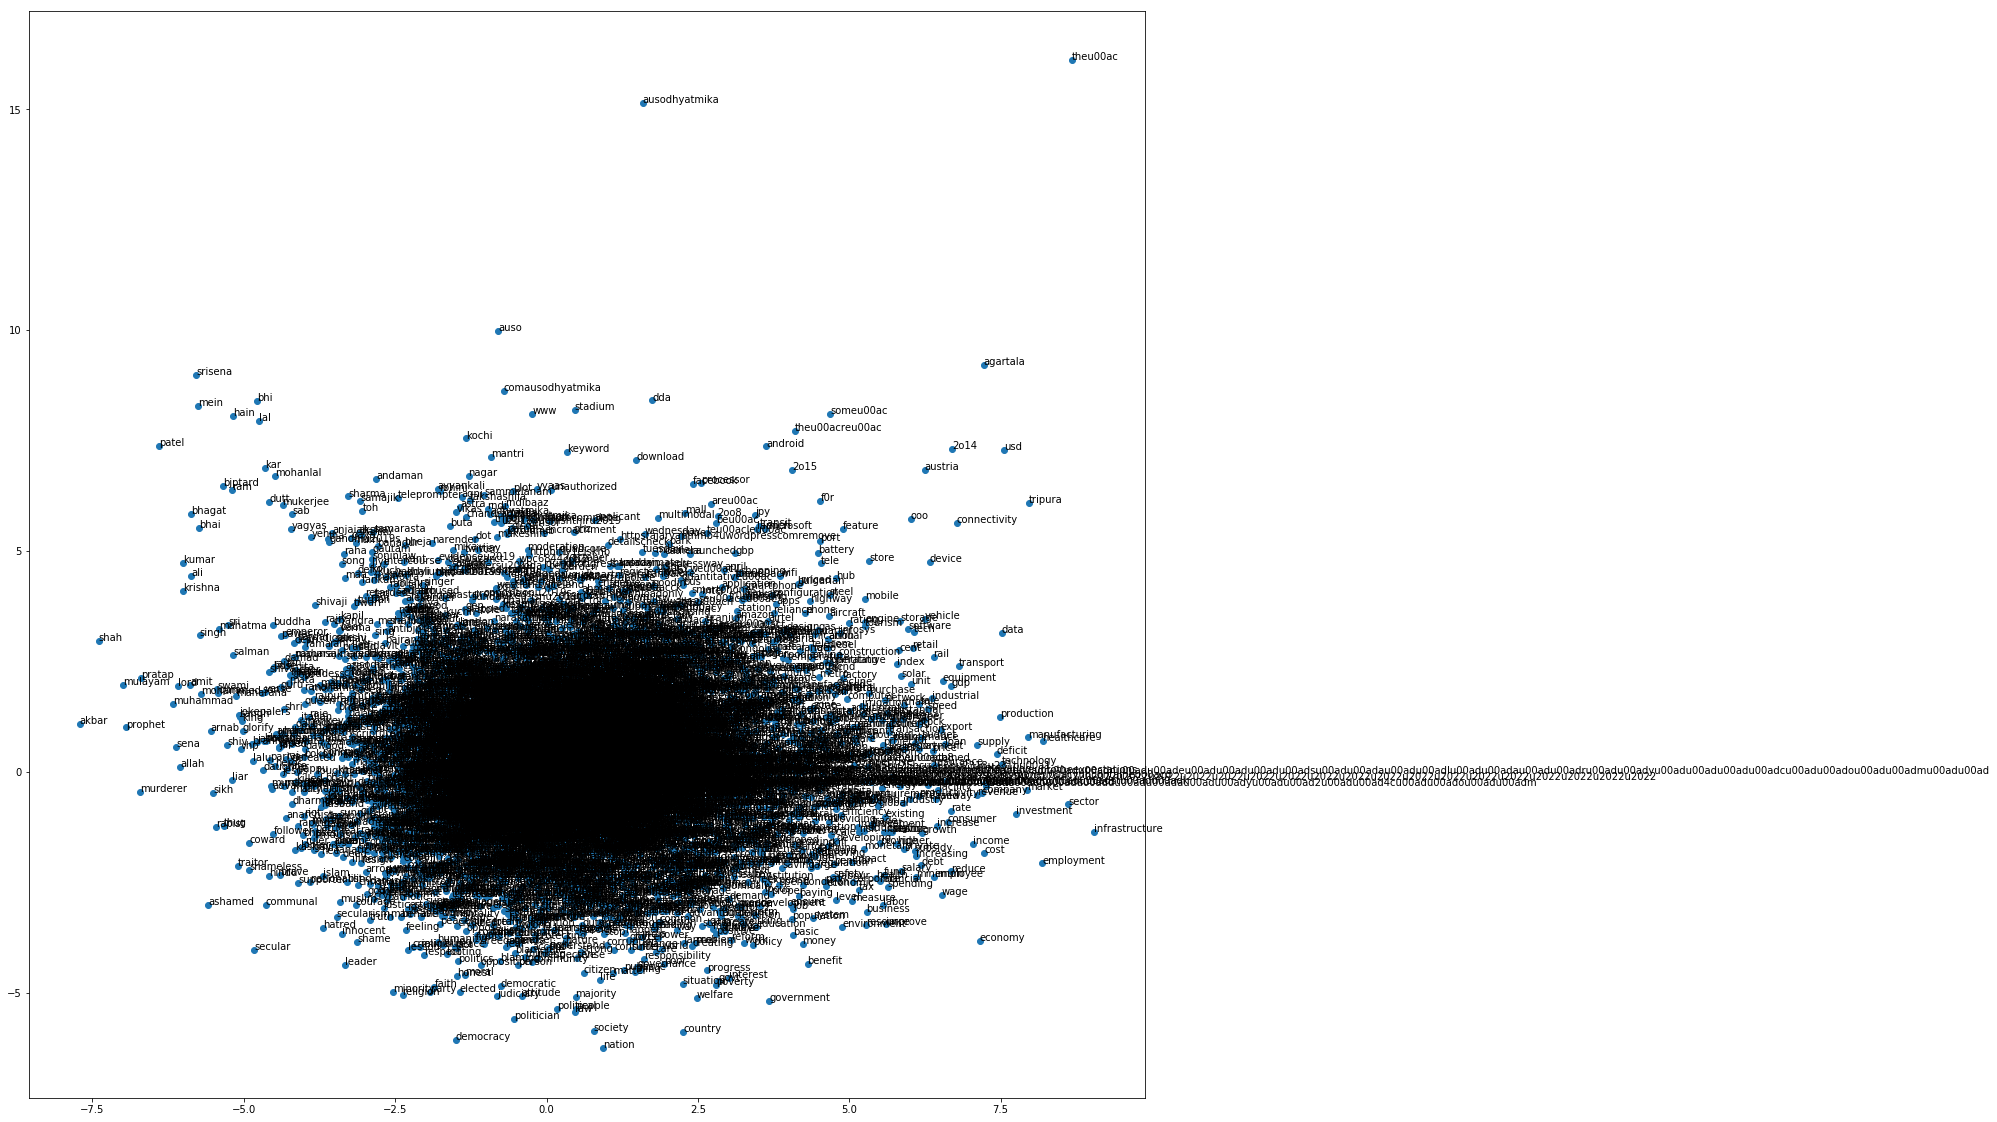

In [36]:
sentences = doc_clean
model = Word2Vec(sentences,workers=3)
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.figure(figsize = (20,20))
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

# <div class="alert alert-block alert-info"> <font color='red'> Non-Anonymous User (Neutral Comments) <font> </div> #



In [37]:
doc_complete = []
with open('verified_neutralcomment.txt') as f:
    for l in f:
        doc_complete.append(l) 

In [38]:
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    stop_free = " ".join([i for i in punc_free.split() if i not in stop_wrd])
    stop_free = ' '.join(i for i in stop_free.split() if not i.startswith('u0'))
    #stop_free = ' '.join(i for i in stop_free.split() if len(i)>3)
    stop_free = " ".join([i for i in stop_free.lower().split() if not unicode(i, 'utf-8').isnumeric()])
    normalized = " ".join(lemma.lemmatize(word) for word in stop_free.split())
    return normalized
doc_clean = [clean(doc).split() for doc in doc_complete]
print(doc_clean[:5])

[['tennesseeproud'], [u'decide', u'woman', u'havent', u'thought', u'decision', u'time', u'consult', u'doctor', u'arrogant', u'busybody'], ['bragging', 'complaining'], ['id', 'favor', 'bill', 'abortion', 'form', 'surgery'], [u'funny', u'edit', u'statement', u'past', u'censor', u'appearrently', u'f', u'word', u'injection', u'well', u'allowed', u'article']]


In [39]:
# frequency calculation of token in all documents
frequency = defaultdict(int)
for text in doc_clean:
    for token in text:
        frequency[token] += 1

In [40]:
# make new text data by removing out the token that have occurence less then 2
minimum_freq = 1
len_of_token = 2
# doc_clean = [[token for token in text if frequency[token] > minimum_freq]
#           for text in doc_clean]
doc_clean = [[token for token in text if len(token) > len_of_token and frequency[token] > minimum_freq]
          for text in doc_clean]
# print doc_clean1[17]

In [41]:
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# LDA

In [ ]:
Lda = gensim.models.ldamulticore.LdaMulticore
ldamodel = Lda(doc_term_matrix, num_topics=200, id2word = dictionary, passes=20)

In [ ]:
#top_topics = model.top_topics(corpus, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
#avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
#print('Average topic coherence: %.4f.' % avg_topic_coherence)

#from pprint import pprint
#pprint(top_topics)

In [ ]:
print(ldamodel.print_topics(num_topics=20))

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)

# LSI

In [42]:
model = LsiModel(doc_term_matrix, id2word=dictionary,num_topics=20)  # train model

In [43]:
for c in model.print_topics(200):
     print c

(0, u'0.995*"azadi" + 0.059*"rahenge" + 0.059*"leke" + 0.058*"hum" + 0.002*"khalistan" + 0.001*"rahega" + 0.001*"baan" + 0.000*"tha" + 0.000*"hua" + 0.000*"india"')
(1, u'1.000*"freedom" + 0.001*"india" + 0.000*"people" + 0.000*"zindaabaad" + 0.000*"indian" + 0.000*"moordabaad" + 0.000*"country" + 0.000*"pakistan" + 0.000*"government" + 0.000*"govt"')
(2, u'0.381*"delhi" + 0.378*"kolkata" + 0.378*"stink" + 0.378*"courtesy" + 0.378*"italina" + 0.378*"mdhrch0d" + 0.373*"rnditime" + 0.006*"time" + 0.005*"people" + 0.005*"rndi"')
(3, u'0.588*"hindustan" + 0.570*"dhakka" + 0.570*"tor" + 0.029*"pakistan" + 0.028*"baad" + 0.028*"zinda" + 0.020*"hindu" + 0.017*"saeed" + 0.014*"hafiz" + 0.009*"maa"')
(4, u'0.578*"rahenge" + 0.578*"leke" + 0.542*"hum" + 0.161*"khalistan" + -0.101*"azadi" + 0.037*"rahega" + 0.037*"baan" + 0.002*"baad" + 0.002*"zinda" + 0.001*"people"')
(5, u'0.564*"baad" + 0.563*"zinda" + 0.385*"pakistan" + 0.340*"saeed" + 0.287*"hafiz" + 0.072*"banega" + 0.058*"yehi" + 0.058*"ha

# Heat Map

In [44]:
K = model.num_topics
columns = []
columns_dict = {}
for k in range(1,K+1):
    columns.append(str(k))
    columns_dict[k-1] = ""

In [45]:
df = pd.DataFrame(columns = columns)
pd.set_option('display.width', 1000)
zz = np.zeros(shape=(1000,K))
last_number=0
DC={}
for x in range (10):
  data = pd.DataFrame(columns_dict,index=[0])
  df=df.append(data,ignore_index=True)  
for line in model.print_topics(num_topics=K):
    tp, w = line
    #print tp
    probs=w.split("+")
    y=0
    for pr in probs:
        a=pr.split("*")
        df.iloc[y,tp] = a[1]       
        if a[1] in DC:
           zz[DC[a[1]]][tp]=a[0]
        else:
           zz[last_number][tp]=a[0]
           DC[a[1]]=last_number
           last_number=last_number+1
        y=y+1

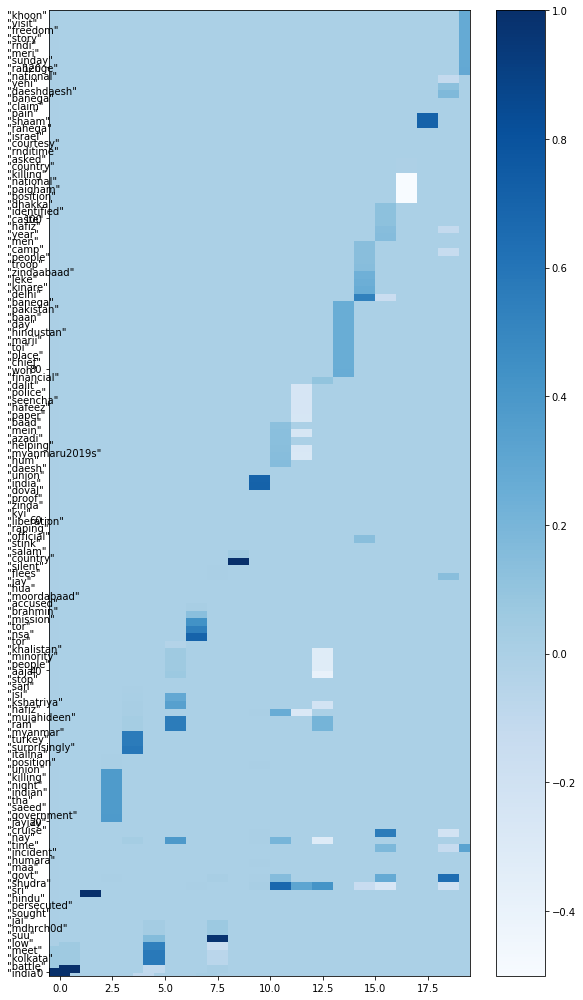

In [46]:
zz=np.resize(zz,(len(DC.keys()),zz.shape[1]))
plt.figure(figsize = (8,14))
plt.pcolor(zz,norm=None, cmap='Blues')
plt.colorbar(cmap='Blues')
plt.imshow(zz, cmap='Blues', interpolation='nearest',aspect='auto')
for val, key in enumerate(DC.keys()):
        plt.text(-2.5, val + 0.5, key,
                 horizontalalignment='left',
                 verticalalignment='top'
                 )
plt.gca().invert_yaxis()      # flip the y-axis so the texts are in the order
plt.tight_layout()            # fixes margins
plt.show()

In [47]:
def topics_to_vectorspace(n_topics, n_words=100):
    rows = []
    for i in xrange(n_topics):
        temp = model.show_topic(i, n_words)
        row = dict(((j[1],j[0]) for j in temp))
        rows.append(row)
    return rows
vec = DictVectorizer()
X = vec.fit_transform(topics_to_vectorspace(K))
X.shape

(20, 1934)

# PCA

In [ ]:
#pca = PCA(n_components=2)
#X_pca = pca.fit(X.toarray()).transform(X.toarray())
#for i in xrange(X_pca.shape[0]):
#    plt.scatter(X_pca[i, 0], X_pca[i, 1], alpha=.5)
#    plt.text(X_pca[i, 0], X_pca[i, 1], s=' ' + str(i))    
#plt.show()

/home/ubuntu/.virtualenvs/nlp/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


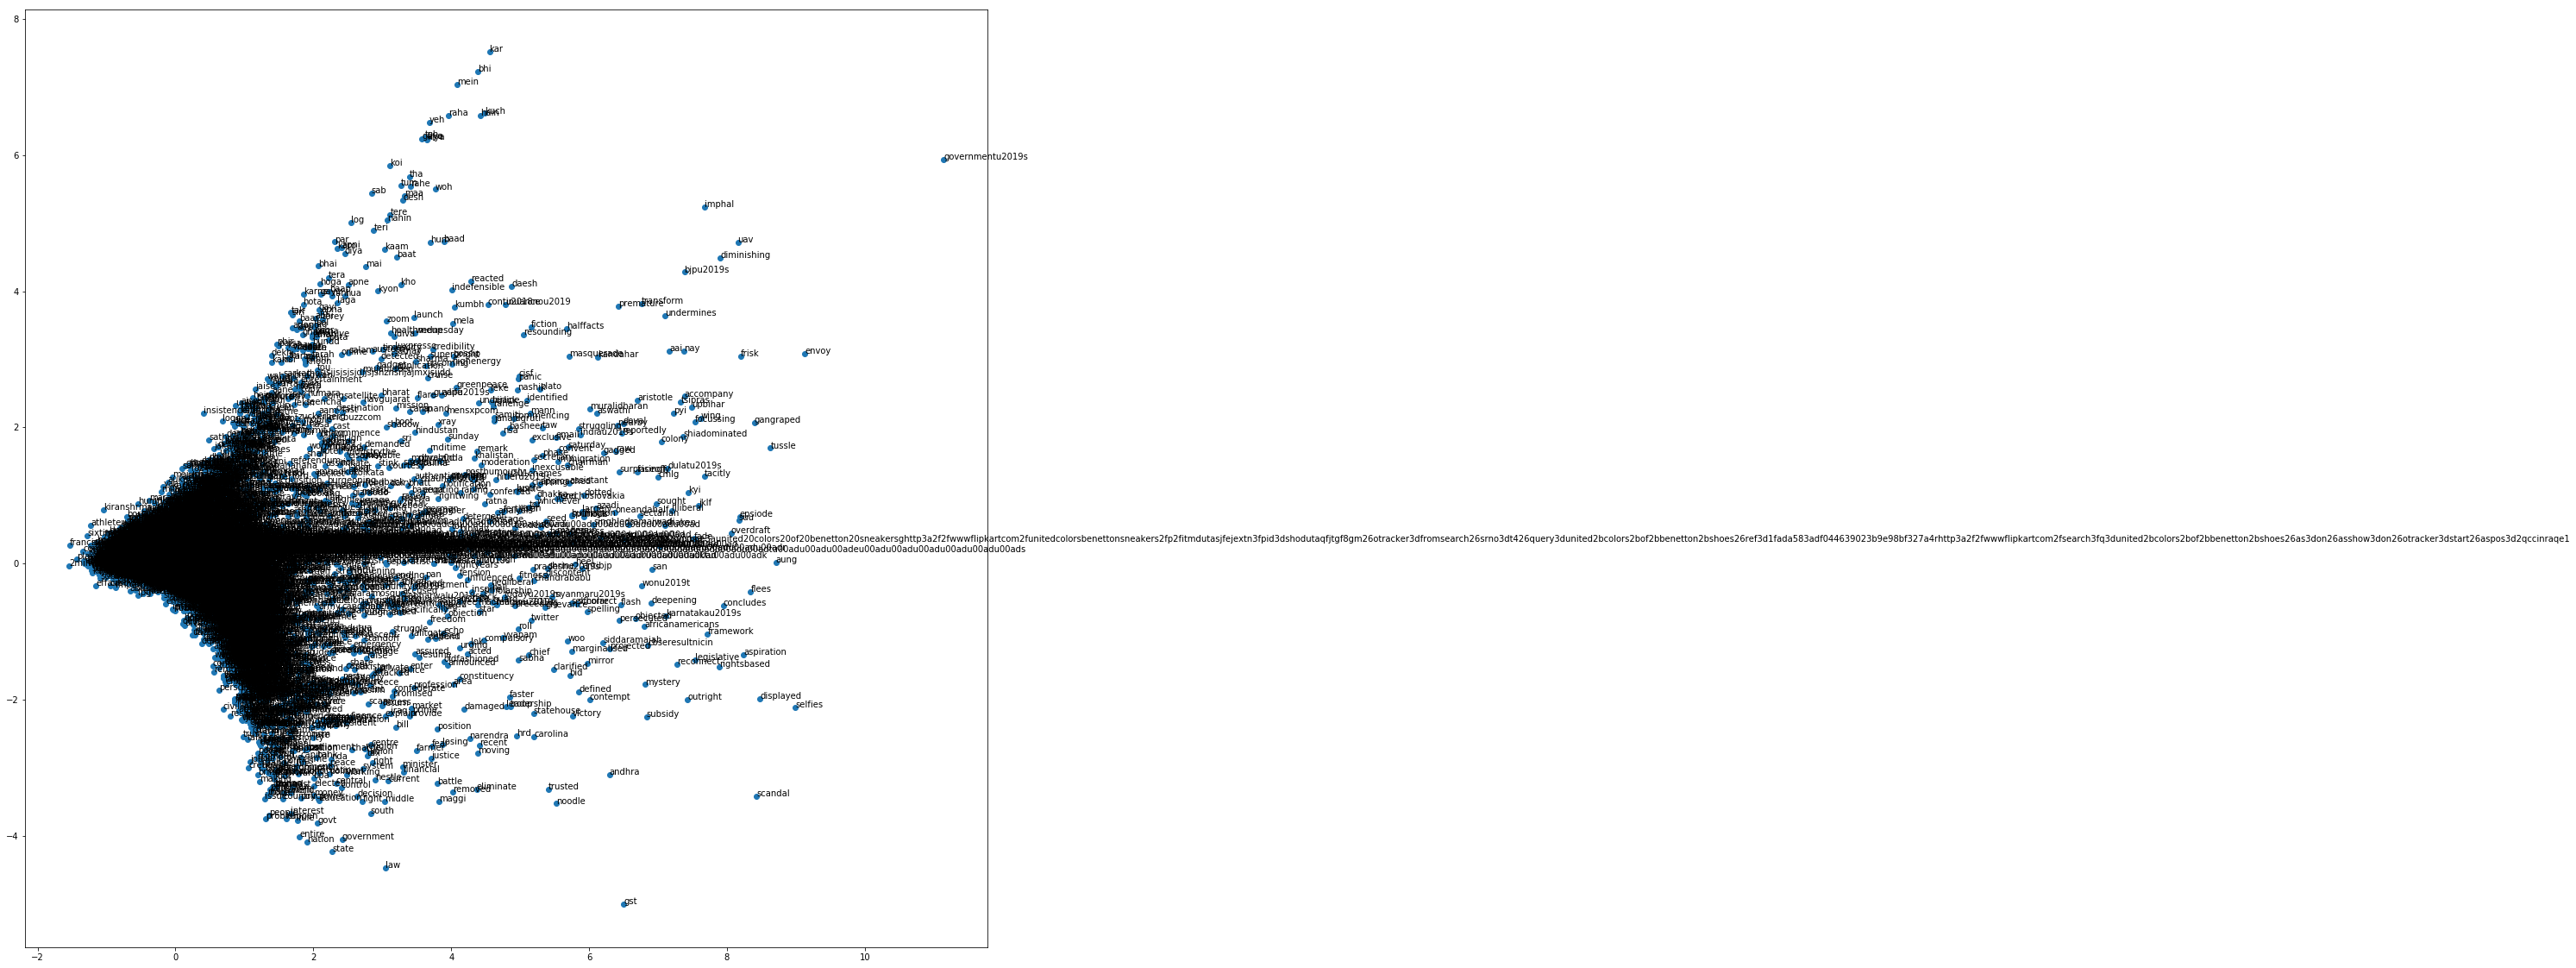

In [48]:
sentences = doc_clean
model = Word2Vec(sentences,workers=3)
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.figure(figsize = (20,20))
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

# <div class="alert alert-block alert-info"><font color='red'> Anonymous user (Negative Comments) </font> </div>

In [49]:
doc_complete = []
with open('anony_negativecomment.txt') as f:
    for l in f:
        doc_complete.append(l) 

In [50]:
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    stop_free = " ".join([i for i in punc_free.split() if i not in stop_wrd])
    stop_free = ' '.join(i for i in stop_free.split() if not i.startswith('u0'))
    #stop_free = ' '.join(i for i in stop_free.split() if len(i)>3)
    stop_free = " ".join([i for i in stop_free.lower().split() if not unicode(i, 'utf-8').isnumeric()])
    normalized = " ".join(lemma.lemmatize(word) for word in stop_free.split())
    return normalized
doc_clean = [clean(doc).split() for doc in doc_complete]
print(doc_clean[:5])

[['sad', 'share', 'felt', 'thiland'], [u'absolute', u'yellow', u'journalism', u'indianexpress', u'cnn', u'published', u'article', u'research', u'pew', u'research', u'center', u'cnn', u'article', u'analysis', u'finding', u'pew', u'cnn', u'article', u'outline', u'growth', u'islam', u'christianity', u'hinduism', u'mention', u'religion', u'including', u'hinduism', u'usual', u'grab', u'headline', u'divert', u'focus', u'hindusim', u'usual', u'distasteful', u'headline', u'grabbing', u'attempt'], ['suffering', 'mad', 'cow', 'disease', 'relevance', 'mad', 'cow', 'comment', 'news', 'report', 'question', 'suggest', 'deep', 'swig', 'mad', 'cow', 'muthra', 'clear', 'early', 'morning', 'foggy', 'brain'], ['theyre', 'average', 'people'], [u'holiday', u'christian', u'commemoration', u'death', u'resurrection', u'christ', u'basic', u'thing', u'denied', u'christian', u'respective', u'government', u'authority', u'acknowledge', u'christian', u'considered', u'equal', u'unequals', u'society', u'clear', u'gri

In [51]:
# frequency calculation of token in all documents
frequency = defaultdict(int)
for text in doc_clean:
    for token in text:
        frequency[token] += 1

In [52]:
# make new text data by removing out the token that have occurence less then 2
minimum_freq = 1
len_of_token = 2
# doc_clean = [[token for token in text if frequency[token] > minimum_freq]
#           for text in doc_clean]
doc_clean = [[token for token in text if len(token) > len_of_token and frequency[token] > minimum_freq]
          for text in doc_clean]
# print doc_clean1[17]

In [53]:
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# LDA

In [ ]:
Lda = gensim.models.ldamulticore.LdaMulticore
ldamodel = Lda(doc_term_matrix, num_topics=200, id2word = dictionary, passes=20)

In [ ]:
#top_topics = model.top_topics(corpus, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
#avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
#print('Average topic coherence: %.4f.' % avg_topic_coherence)

#from pprint import pprint
#pprint(top_topics)

In [ ]:
print(ldamodel.print_topics(num_topics=20))

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)

# LSI

In [54]:
model = LsiModel(doc_term_matrix, id2word=dictionary,num_topics=20)  # train model

In [55]:
for c in model.print_topics(200):
     print c

(0, u'0.458*"local" + 0.350*"government" + 0.305*"administration" + 0.180*"party" + 0.172*"called" + 0.169*"delhi" + 0.168*"wrong" + 0.163*"common" + 0.160*"condition" + 0.157*"voted"')
(1, u'-0.446*"husband" + -0.265*"thrown" + -0.262*"mha" + -0.262*"prepared" + -0.190*"case" + -0.180*"woman" + -0.145*"head" + -0.132*"line" + -0.131*"brace" + -0.131*"sooner"')
(2, u'0.663*"child" + 0.315*"seat" + 0.315*"car" + 0.233*"mother" + 0.210*"lap" + 0.210*"driver" + 0.152*"parent" + 0.122*"death" + 0.116*"turn" + 0.114*"fact"')
(3, u'-0.676*"judge" + -0.327*"limit" + -0.262*"judiciary" + -0.218*"action" + -0.218*"removed" + -0.218*"judgment" + -0.218*"delivers" + -0.131*"case" + -0.119*"nation" + -0.111*"freedom"')
(4, u'0.324*"city" + 0.324*"developed" + 0.254*"people" + 0.206*"country" + -0.206*"judge" + 0.187*"poison" + 0.187*"read" + 0.174*"kcr" + 0.174*"state" + 0.165*"idiot"')
(5, u'-0.535*"employee" + -0.244*"year" + -0.244*"high" + -0.224*"overthe" + -0.224*"surprising" + -0.224*"satis

# Heat Map

In [56]:
K = model.num_topics
columns = []
columns_dict = {}
for k in range(1,K+1):
    columns.append(str(k))
    columns_dict[k-1] = ""

In [57]:
df = pd.DataFrame(columns = columns)
pd.set_option('display.width', 1000)
zz = np.zeros(shape=(1000,K))
last_number=0
DC={}
for x in range (10):
  data = pd.DataFrame(columns_dict,index=[0])
  df=df.append(data,ignore_index=True)  
for line in model.print_topics(num_topics=K):
    tp, w = line
    #print tp
    probs=w.split("+")
    y=0
    for pr in probs:
        a=pr.split("*")
        df.iloc[y,tp] = a[1]       
        if a[1] in DC:
           zz[DC[a[1]]][tp]=a[0]
        else:
           zz[last_number][tp]=a[0]
           DC[a[1]]=last_number
           last_number=last_number+1
        y=y+1

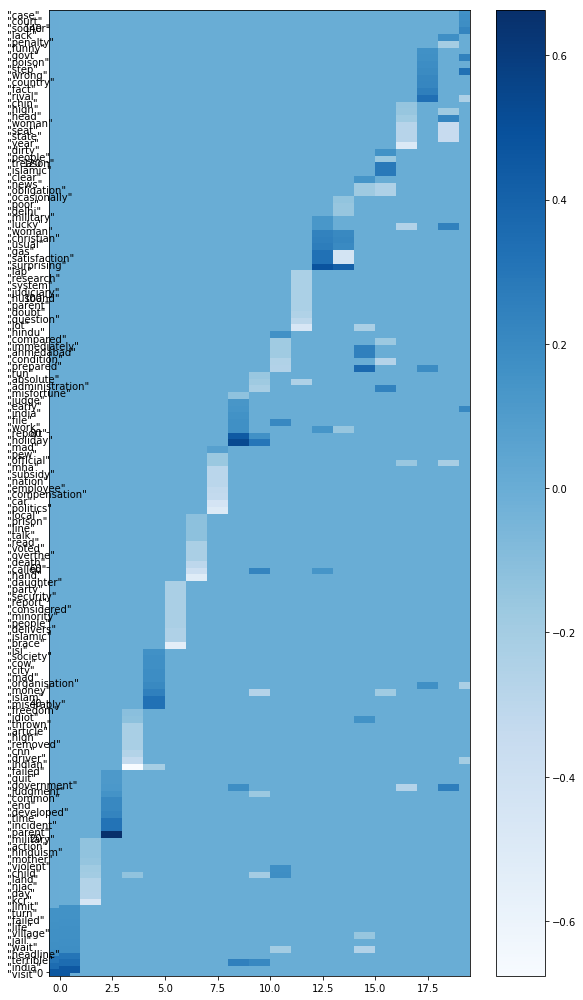

In [58]:
zz=np.resize(zz,(len(DC.keys()),zz.shape[1]))
plt.figure(figsize = (8,14))
plt.pcolor(zz,norm=None, cmap='Blues')
plt.colorbar(cmap='Blues')
plt.imshow(zz, cmap='Blues', interpolation='nearest',aspect='auto')
for val, key in enumerate(DC.keys()):
        plt.text(-2.5, val + 0.5, key,
                 horizontalalignment='left',
                 verticalalignment='top'
                 )
plt.gca().invert_yaxis()      # flip the y-axis so the texts are in the order
plt.tight_layout()            # fixes margins
plt.show()

In [59]:
def topics_to_vectorspace(n_topics, n_words=100):
    rows = []
    for i in xrange(n_topics):
        temp = model.show_topic(i, n_words)
        row = dict(((j[1],j[0]) for j in temp))
        rows.append(row)
    return rows
vec = DictVectorizer()
X = vec.fit_transform(topics_to_vectorspace(K))
X.shape

(20, 1550)

# PCA

In [ ]:
#pca = PCA(n_components=2)
#X_pca = pca.fit(X.toarray()).transform(X.toarray())
#for i in xrange(X_pca.shape[0]):
#    plt.scatter(X_pca[i, 0], X_pca[i, 1], alpha=.5)
#    plt.text(X_pca[i, 0], X_pca[i, 1], s=' ' + str(i))    
#plt.show()

/home/ubuntu/.virtualenvs/nlp/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


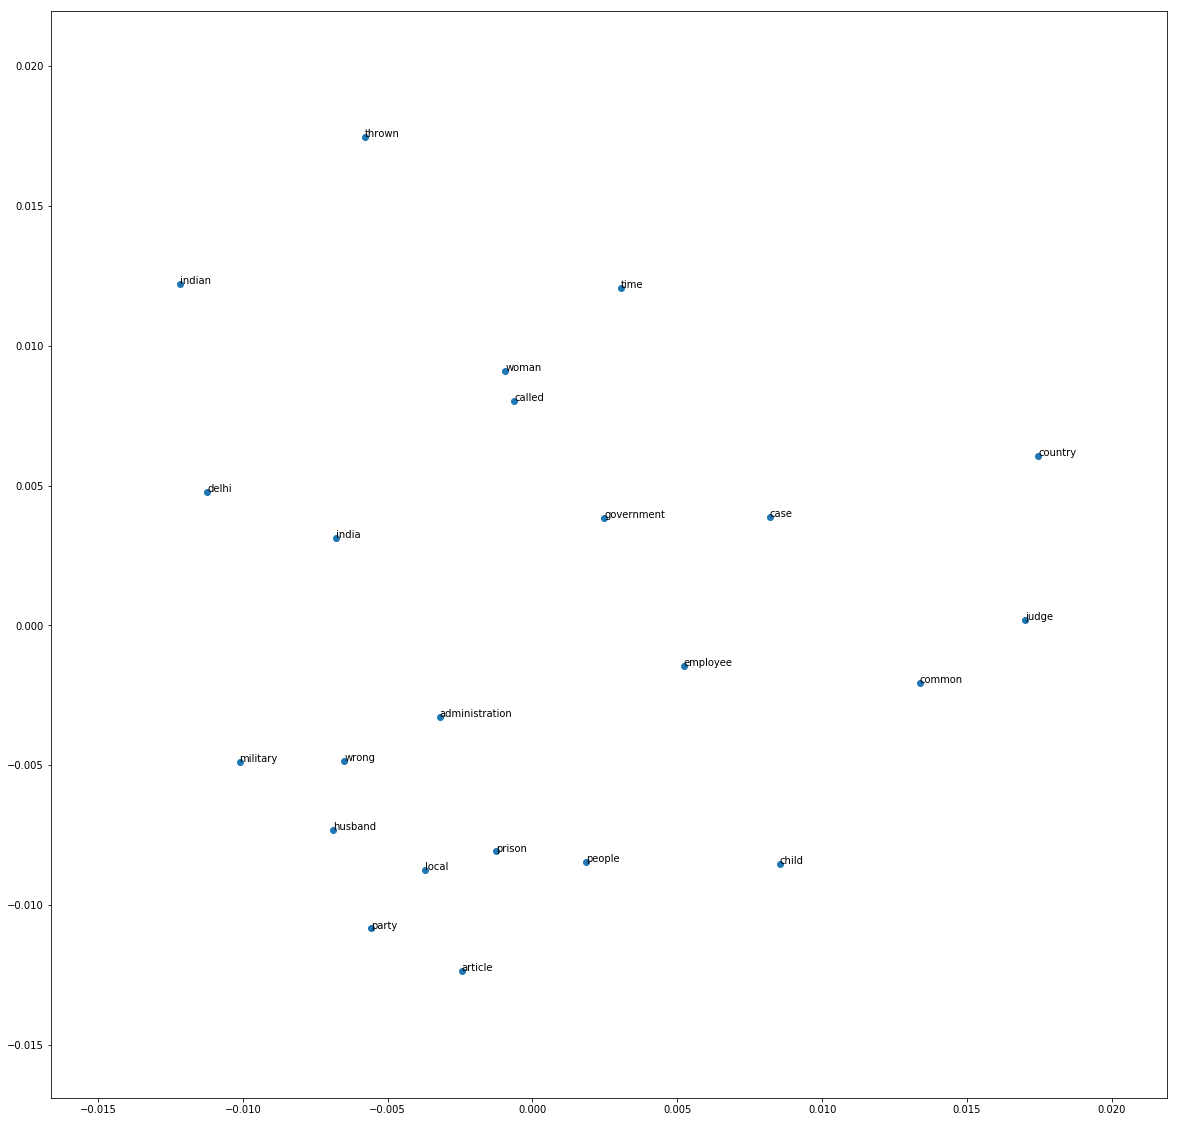

In [60]:
sentences = doc_clean
model = Word2Vec(sentences,workers=3)
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.figure(figsize = (20,20))
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

# <div class="alert alert-block alert-info"><font color='red'> Anonymous user (Positive Comments) </font></div>

In [61]:
doc_complete = []
with open('anony_positivecomment.txt') as f:
    for l in f:
        doc_complete.append(l) 

In [62]:
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    stop_free = " ".join([i for i in punc_free.split() if i not in stop_wrd])
    stop_free = ' '.join(i for i in stop_free.split() if not i.startswith('u0'))
    #stop_free = ' '.join(i for i in stop_free.split() if len(i)>3)
    stop_free = " ".join([i for i in stop_free.lower().split() if not unicode(i, 'utf-8').isnumeric()])
    normalized = " ".join(lemma.lemmatize(word) for word in stop_free.split())
    return normalized
doc_clean = [clean(doc).split() for doc in doc_complete]
print(doc_clean[:5])

[[u'oscar', u'award', u'award', u'ceremony', u'told', u'exclusively', u'ak', u'principal', u'lackey', u'hollywood', u'withstand', u'competition', u'performance', u'entry', u'closed', u'india', u'proud'], [u'oscar', u'award', u'award', u'ceremony', u'told', u'exclusively', u'ak', u'principal', u'lackey', u'hollywood', u'withstand', u'competition', u'performance', u'entry', u'closed', u'india', u'proud'], [u'government', u'bsnl', u'matter', u'sick', u'psu', u'psus', u'meant', u'standalone', u'unit', u'government', u'asset', u'supposed', u'pay', u'dividend', u'profit', u'government', u'case', u'bsnl', u'living', u'pre', u'monopoly', u'era', u'change', u'landline', u'mobile', u'connection', u'talking', u'country', u'marching', u'super', u'power', u'telecom', u'behemoth', u'extra', u'flab', u'rid', u'p', u'employee', u'bsnl'], [u'occasionally', u'judgment', u'blatantly', u'prowifewoman', u'congratulation', u'honourable', u'judge', u'delivering', u'justice', u'family', u'court', u'hcs', u'ru

In [63]:
# frequency calculation of token in all documents
frequency = defaultdict(int)
for text in doc_clean:
    for token in text:
        frequency[token] += 1

In [64]:
# make new text data by removing out the token that have occurence less then 2
minimum_freq = 1
len_of_token = 2
# doc_clean = [[token for token in text if frequency[token] > minimum_freq]
#           for text in doc_clean]
doc_clean = [[token for token in text if len(token) > len_of_token and frequency[token] > minimum_freq]
          for text in doc_clean]
# print doc_clean1[17]

In [65]:
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# LDA

In [66]:
Lda = gensim.models.ldamulticore.LdaMulticore
ldamodel = Lda(doc_term_matrix, num_topics=200, id2word = dictionary, passes=20)

In [ ]:
#top_topics = model.top_topics(corpus, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
#avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
#print('Average topic coherence: %.4f.' % avg_topic_coherence)

#from pprint import pprint
#pprint(top_topics)

In [67]:
print(ldamodel.print_topics(num_topics=20))

[(71, u'0.002*"party" + 0.002*"people" + 0.002*"sentiment" + 0.002*"keeping" + 0.002*"nation" + 0.002*"expressed" + 0.002*"moon" + 0.002*"check" + 0.002*"similar" + 0.002*"backsideshe"'), (49, u'0.182*"brain" + 0.182*"highest" + 0.182*"stop" + 0.001*"whatlive" + 0.001*"minister" + 0.001*"hyderabad" + 0.001*"village" + 0.001*"english" + 0.001*"tall" + 0.001*"role"'), (156, u'0.002*"english" + 0.002*"acknowledge" + 0.002*"tall" + 0.002*"working" + 0.002*"hyderabad" + 0.002*"village" + 0.002*"making" + 0.002*"whatlive" + 0.002*"arrested" + 0.002*"minister"'), (74, u'0.002*"english" + 0.002*"acknowledge" + 0.002*"tall" + 0.002*"working" + 0.002*"hyderabad" + 0.002*"village" + 0.002*"making" + 0.002*"whatlive" + 0.002*"arrested" + 0.002*"minister"'), (171, u'0.098*"ngo" + 0.098*"industry" + 0.049*"livelihood" + 0.049*"work" + 0.049*"recognize" + 0.049*"received" + 0.049*"people" + 0.049*"criminal" + 0.049*"news" + 0.049*"funding"'), (42, u'0.002*"english" + 0.002*"acknowledge" + 0.002*"tall

In [68]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)

/home/ubuntu/.virtualenvs/nlp/local/lib/python2.7/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


TypeError: (0.16588457206344898+0j) is not JSON serializable

PreparedData(topic_coordinates=            Freq  cluster  topics                           x                             y
topic                                                                                      
111    10.977352        1       1    (0.16147361199982918+0j)      (0.16588457206344898+0j)
184     8.511467        1       2    (0.08401641068273327+0j)      (0.08517632252008865+0j)
35      6.926523        1       3    (0.16839057026150633+0j)      (0.07262693424459182+0j)
89      5.487150        1       4    (0.19065612296121404+0j)     (0.030712545982985347+0j)
145     4.405671        1       5     (0.1383557614102763+0j)      (0.03722387035239232+0j)
24      3.803696        1       6     (0.1899916939914836+0j)      (0.09298752644546085+0j)
159     3.334485        1       7    (0.18973246133937993+0j)      (0.13739231766274068+0j)
70      3.205277        1       8    (0.16738590905801326+0j)    (-0.054079105463975014+0j)
185     2.876343        1       9    (0.172277042

# LSI

In [69]:
model = LsiModel(doc_term_matrix, id2word=dictionary,num_topics=20)  # train model

In [70]:
for c in model.print_topics(200):
     print c

(0, u'0.658*"woman" + 0.442*"sex" + 0.335*"man" + 0.218*"men" + 0.192*"child" + 0.127*"year" + 0.125*"cheating" + 0.102*"marriage" + 0.101*"marry" + 0.100*"mother"')
(1, u'-0.439*"bank" + -0.307*"crore" + -0.293*"people" + -0.176*"risk" + -0.171*"channel" + -0.159*"issue" + -0.139*"work" + -0.132*"financial" + -0.132*"roy" + -0.130*"world"')
(2, u'-0.405*"bank" + -0.284*"crore" + 0.281*"people" + 0.198*"work" + 0.186*"native" + -0.162*"risk" + 0.146*"channel" + -0.122*"roy" + -0.122*"financial" + 0.111*"fool"')
(3, u'0.331*"judge" + 0.250*"cji" + 0.238*"letter" + 0.180*"good" + 0.169*"holiday" + 0.159*"covertly" + 0.159*"communal" + 0.159*"write" + 0.159*"christian" + 0.147*"obligation"')
(4, u'-0.576*"meizu" + -0.360*"display" + -0.360*"note" + -0.288*"mi4i" + -0.158*"correct" + -0.155*"support" + -0.149*"feel" + -0.145*"band" + -0.144*"frequency" + -0.144*"strength"')
(5, u'0.268*"add" + 0.173*"judge" + 0.171*"constitution" + 0.168*"question" + 0.160*"law" + 0.153*"happen" + 0.151*"t

# Heat Map

In [71]:
K = model.num_topics
columns = []
columns_dict = {}
for k in range(1,K+1):
    columns.append(str(k))
    columns_dict[k-1] = ""

In [72]:
df = pd.DataFrame(columns = columns)
pd.set_option('display.width', 1000)
zz = np.zeros(shape=(1000,K))
last_number=0
DC={}
for x in range (10):
  data = pd.DataFrame(columns_dict,index=[0])
  df=df.append(data,ignore_index=True)  
for line in model.print_topics(num_topics=K):
    tp, w = line
    #print tp
    probs=w.split("+")
    y=0
    for pr in probs:
        a=pr.split("*")
        df.iloc[y,tp] = a[1]       
        if a[1] in DC:
           zz[DC[a[1]]][tp]=a[0]
        else:
           zz[last_number][tp]=a[0]
           DC[a[1]]=last_number
           last_number=last_number+1
        y=y+1

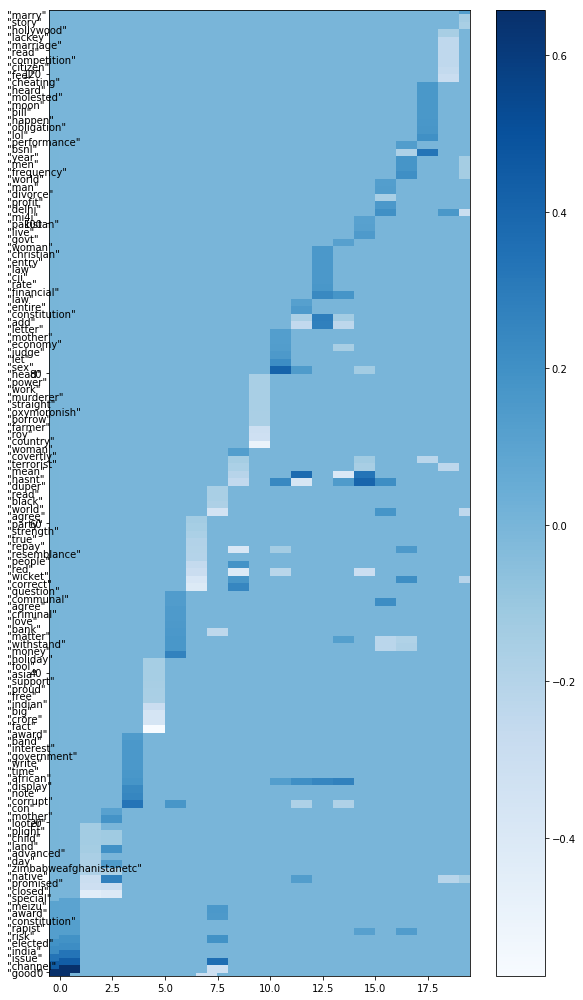

In [73]:
zz=np.resize(zz,(len(DC.keys()),zz.shape[1]))
plt.figure(figsize = (8,14))
plt.pcolor(zz,norm=None, cmap='Blues')
plt.colorbar(cmap='Blues')
plt.imshow(zz, cmap='Blues', interpolation='nearest',aspect='auto')
for val, key in enumerate(DC.keys()):
        plt.text(-2.5, val + 0.5, key,
                 horizontalalignment='left',
                 verticalalignment='top'
                 )
plt.gca().invert_yaxis()      # flip the y-axis so the texts are in the order
plt.tight_layout()            # fixes margins
plt.show()

In [74]:
def topics_to_vectorspace(n_topics, n_words=100):
    rows = []
    for i in xrange(n_topics):
        temp = model.show_topic(i, n_words)
        row = dict(((j[1],j[0]) for j in temp))
        rows.append(row)
    return rows
vec = DictVectorizer()
X = vec.fit_transform(topics_to_vectorspace(K))
X.shape

(20, 1521)

# PCA

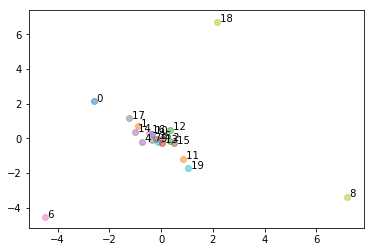

In [75]:
#pca = PCA(n_components=2)
#X_pca = pca.fit(X.toarray()).transform(X.toarray())
#for i in xrange(X_pca.shape[0]):
#    plt.scatter(X_pca[i, 0], X_pca[i, 1], alpha=.5)
#    plt.text(X_pca[i, 0], X_pca[i, 1], s=' ' + str(i))    
#plt.show()

/home/ubuntu/.virtualenvs/nlp/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


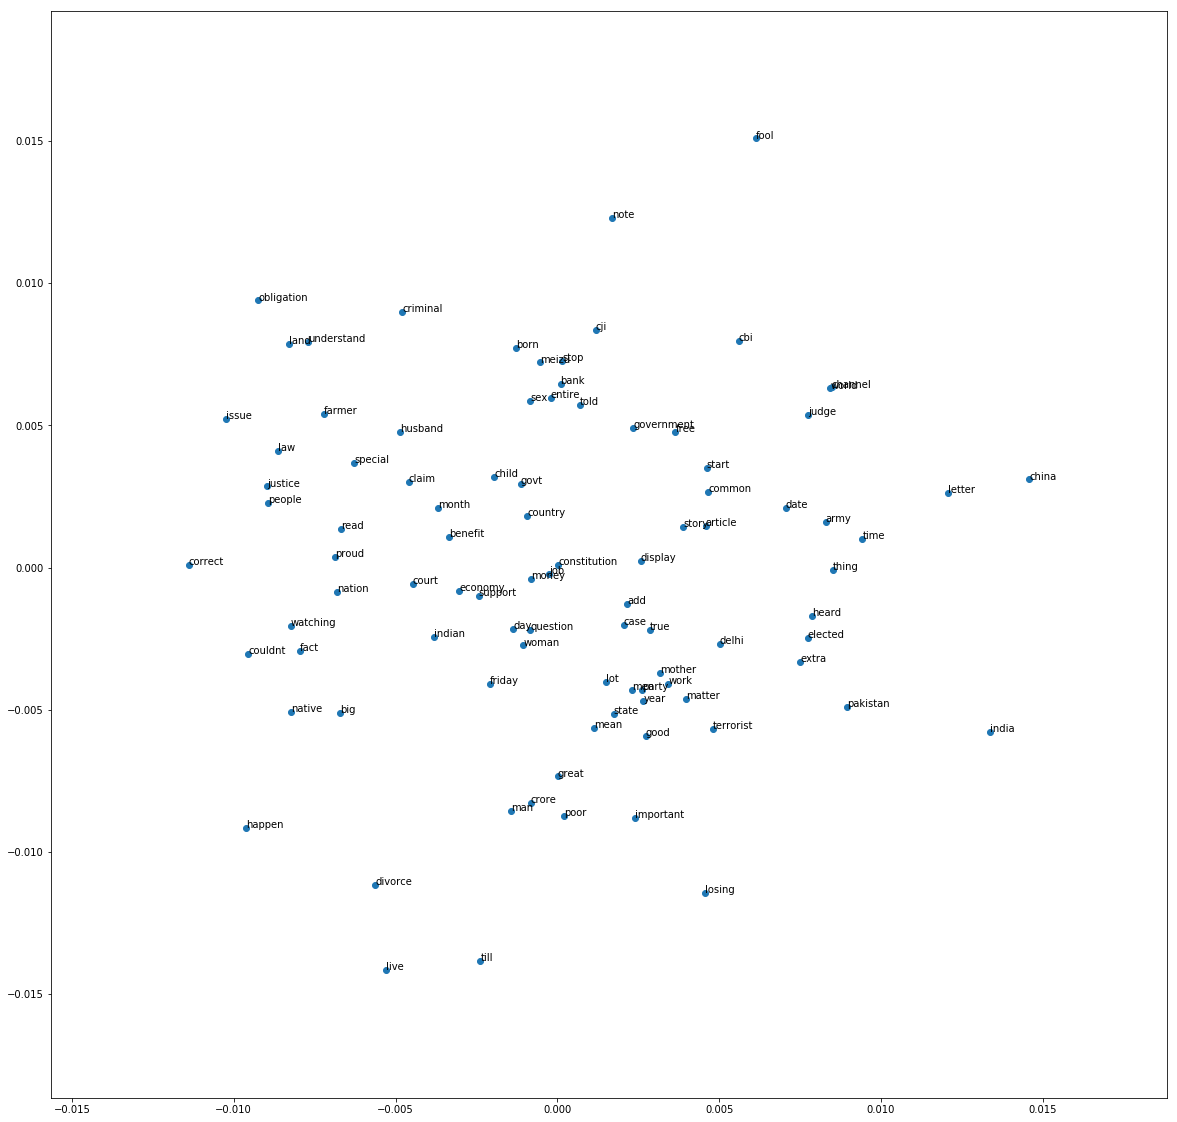

In [76]:
sentences = doc_clean
model = Word2Vec(sentences,workers=3)
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.figure(figsize = (20,20))
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

# <div class="alert alert-block alert-info"><font color='red'> Anonymous user (Neutral Comments) </font></div>

In [77]:
doc_complete = []
with open('anony_neutralcomment.txt') as f:
    for l in f:
        doc_complete.append(l) 

In [78]:
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    stop_free = " ".join([i for i in punc_free.split() if i not in stop_wrd])
    stop_free = ' '.join(i for i in stop_free.split() if not i.startswith('u0'))
    #stop_free = ' '.join(i for i in stop_free.split() if len(i)>3)
    stop_free = " ".join([i for i in stop_free.lower().split() if not unicode(i, 'utf-8').isnumeric()])
    normalized = " ".join(lemma.lemmatize(word) for word in stop_free.split())
    return normalized
doc_clean = [clean(doc).split() for doc in doc_complete]
print(doc_clean[:5])

[['mafia', 'sting', 'expose', 'corruption', 'oscar', 'awardsbtw', 'invited'], ['mafia', 'sting', 'expose', 'corruption', 'oscar', 'awardsbtw', 'invited'], [u'man', u'feel', u'point', u'disclose', u'medium', u'vote', u'bank', u'centric', u'feel', u'thiland', u'dea'], [u'weekday', u'wellitll', u'save', u'lot', u'jam', u'dhaula', u'kuan', u'nh8'], [u'talking', u'presence', u'conference', u'hc', u'cjs', u'mandatory', u'account', u'invited', u'abstained', u'permission', u'cji', u'noticed', u'cared']]


In [79]:
# frequency calculation of token in all documents
frequency = defaultdict(int)
for text in doc_clean:
    for token in text:
        frequency[token] += 1

In [80]:
# make new text data by removing out the token that have occurence less then 2
minimum_freq = 1
len_of_token = 2
# doc_clean = [[token for token in text if frequency[token] > minimum_freq]
#           for text in doc_clean]
doc_clean = [[token for token in text if len(token) > len_of_token and frequency[token] > minimum_freq]
          for text in doc_clean]
# print doc_clean1[17]

In [81]:
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# LDA

In [ ]:
Lda = gensim.models.ldamulticore.LdaMulticore
ldamodel = Lda(doc_term_matrix, num_topics=200, id2word = dictionary, passes=20)

In [ ]:
#top_topics = model.top_topics(corpus, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
#avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
#print('Average topic coherence: %.4f.' % avg_topic_coherence)

#from pprint import pprint
#pprint(top_topics)

In [ ]:
print(ldamodel.print_topics(num_topics=20))

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)

# LSI

In [82]:
model = LsiModel(doc_term_matrix, id2word=dictionary,num_topics=20)  # train model

In [83]:
for c in model.print_topics(200):
     print c

(0, u'-0.372*"daily" + -0.328*"stuff" + -0.328*"big" + -0.328*"basis" + -0.328*"dealsaid" + -0.328*"person" + -0.328*"sane" + -0.328*"sell" + -0.328*"buying" + -0.024*"india"')
(1, u'0.400*"govt" + 0.305*"point" + 0.287*"butpoliticians" + 0.287*"contest" + 0.287*"aloof" + 0.287*"cjis" + 0.287*"supposed" + 0.287*"selling" + 0.287*"photo" + 0.287*"popularity"')
(2, u'-0.353*"cji" + -0.330*"judicial" + -0.330*"caught" + -0.330*"incompetentcorrupt" + -0.330*"increasingly" + -0.330*"litigant" + -0.330*"royally" + -0.330*"system" + -0.330*"screed" + -0.034*"invited"')
(3, u'0.400*"invited" + 0.396*"corruption" + 0.369*"mafia" + 0.369*"sting" + 0.369*"awardsbtw" + 0.369*"oscar" + 0.369*"expose" + 0.034*"mandatory" + -0.017*"litigant" + -0.017*"judicial"')
(4, u'0.408*"bury" + 0.408*"friend" + 0.408*"usurped" + 0.408*"zillion" + 0.408*"farmer" + 0.408*"land" + 0.000*"govt" + -0.000*"cji" + -0.000*"corruption" + -0.000*"work"')
(5, u'0.488*"work" + 0.464*"style" + 0.420*"hindu" + 0.420*"muslim"

# Heat Map

In [84]:
K = model.num_topics
columns = []
columns_dict = {}
for k in range(1,K+1):
    columns.append(str(k))
    columns_dict[k-1] = ""

In [85]:
df = pd.DataFrame(columns = columns)
pd.set_option('display.width', 1000)
zz = np.zeros(shape=(1000,K))
last_number=0
DC={}
for x in range (10):
  data = pd.DataFrame(columns_dict,index=[0])
  df=df.append(data,ignore_index=True)  
for line in model.print_topics(num_topics=K):
    tp, w = line
    #print tp
    probs=w.split("+")
    y=0
    for pr in probs:
        a=pr.split("*")
        df.iloc[y,tp] = a[1]       
        if a[1] in DC:
           zz[DC[a[1]]][tp]=a[0]
        else:
           zz[last_number][tp]=a[0]
           DC[a[1]]=last_number
           last_number=last_number+1
        y=y+1

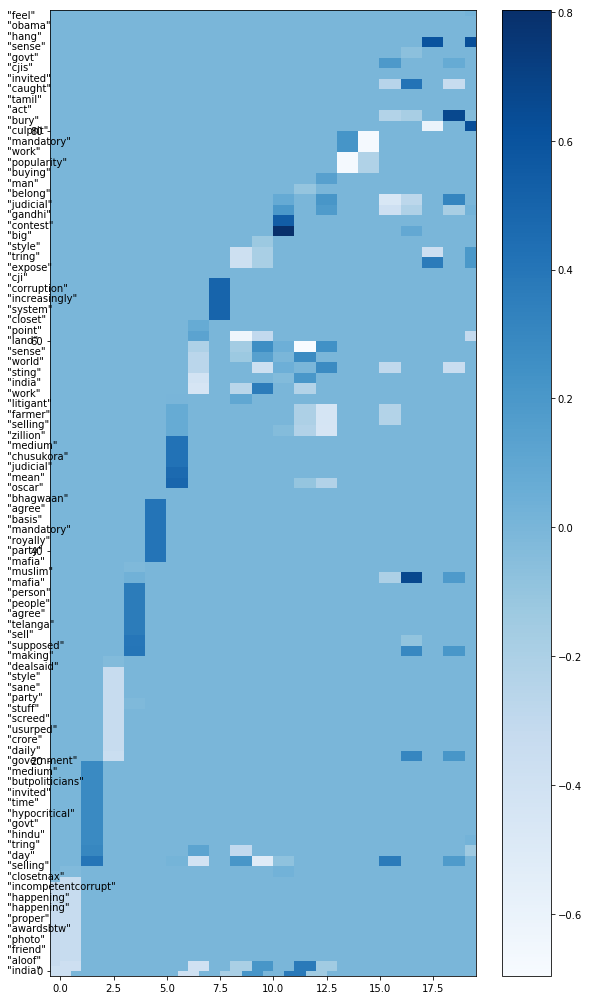

In [86]:
zz=np.resize(zz,(len(DC.keys()),zz.shape[1]))
plt.figure(figsize = (8,14))
plt.pcolor(zz,norm=None, cmap='Blues')
plt.colorbar(cmap='Blues')
plt.imshow(zz, cmap='Blues', interpolation='nearest',aspect='auto')
for val, key in enumerate(DC.keys()):
        plt.text(-2.5, val + 0.5, key,
                 horizontalalignment='left',
                 verticalalignment='top'
                 )
plt.gca().invert_yaxis()      # flip the y-axis so the texts are in the order
plt.tight_layout()            # fixes margins
plt.show()

In [87]:
def topics_to_vectorspace(n_topics, n_words=100):
    rows = []
    for i in xrange(n_topics):
        temp = model.show_topic(i, n_words)
        row = dict(((j[1],j[0]) for j in temp))
        rows.append(row)
    return rows
vec = DictVectorizer()
X = vec.fit_transform(topics_to_vectorspace(K))
X.shape

(20, 1497)

# PCA

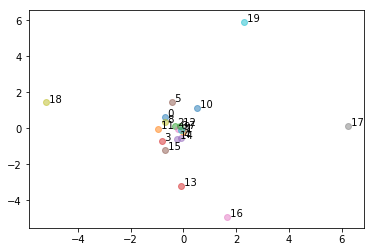

In [88]:
#pca = PCA(n_components=2)
#X_pca = pca.fit(X.toarray()).transform(X.toarray())
#for i in xrange(X_pca.shape[0]):
#    plt.scatter(X_pca[i, 0], X_pca[i, 1], alpha=.5)
#    plt.text(X_pca[i, 0], X_pca[i, 1], s=' ' + str(i))    
#plt.show()

/home/ubuntu/.virtualenvs/nlp/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


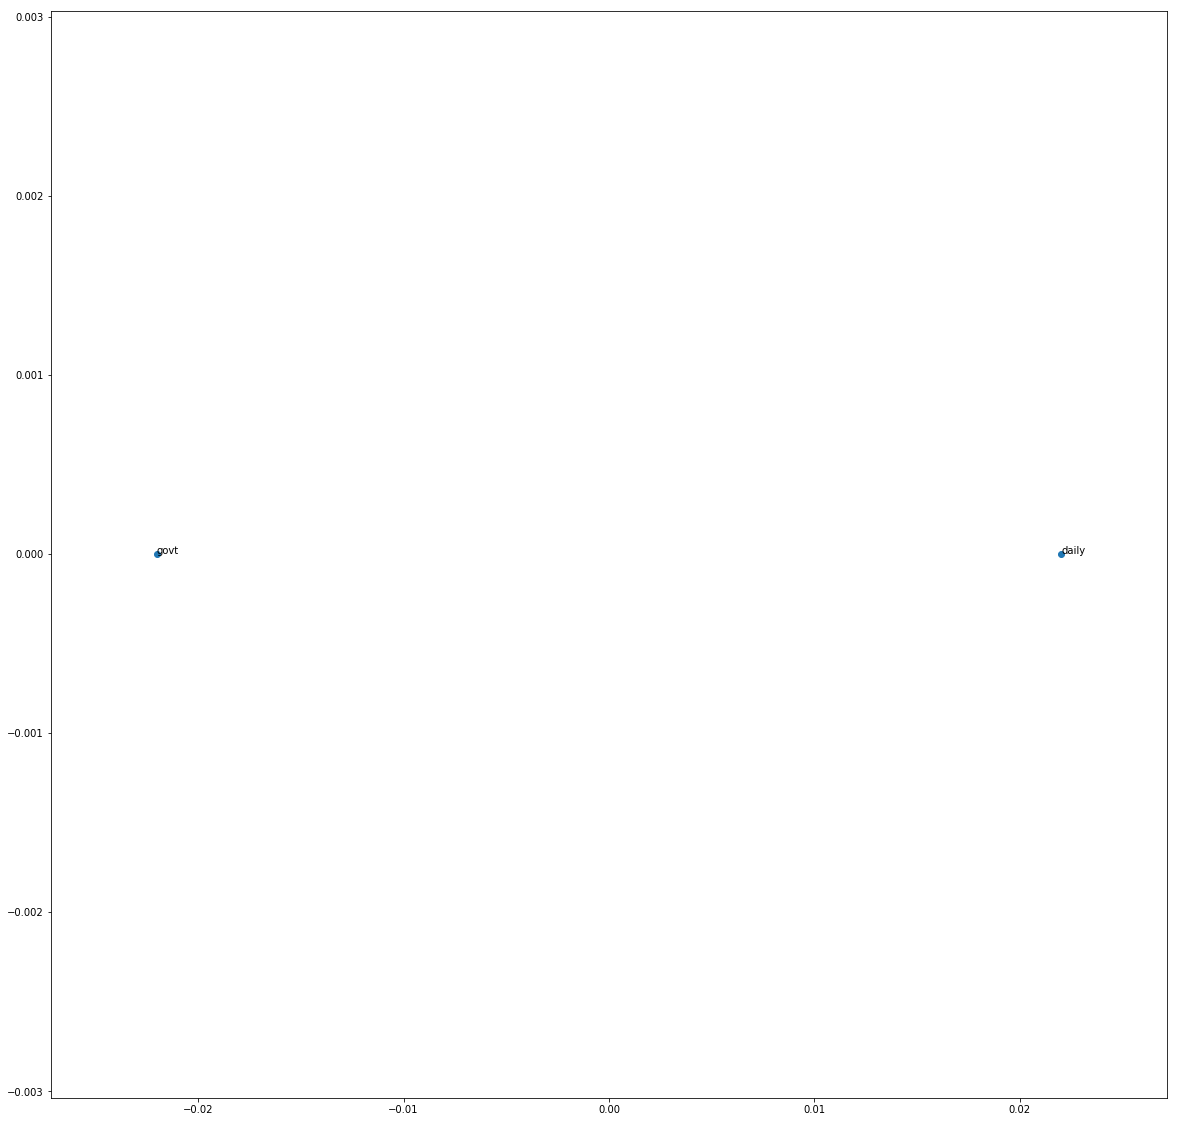

In [89]:
sentences = doc_clean
model = Word2Vec(sentences,workers=3)
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.figure(figsize = (20,20))
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

# <div class="alert alert-block alert-info"><font color='red'> Users with Anonymous profiles (Negative Comments) </font> </div>

In [90]:
doc_complete = []
with open('null_negativecomment.txt') as f:
    for l in f:
        doc_complete.append(l) 

In [91]:
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    stop_free = " ".join([i for i in punc_free.split() if i not in stop_wrd])
    stop_free = ' '.join(i for i in stop_free.split() if not i.startswith('u0'))
    #stop_free = ' '.join(i for i in stop_free.split() if len(i)>3)
    stop_free = " ".join([i for i in stop_free.lower().split() if not unicode(i, 'utf-8').isnumeric()])
    normalized = " ".join(lemma.lemmatize(word) for word in stop_free.split())
    return normalized
doc_clean = [clean(doc).split() for doc in doc_complete]
print(doc_clean[:5])

[[u'reservation', u'caste', u'basis', u'stopped', u'immediately', u'reservation', u'required', u'developing', u'country', u'india', u'basis', u'financial', u'unsecuredor', u'economically', u'unsound', u'family', u'poor', u'people', u'enjoy', u'reservation', u'stipend', u'unreserved', u'category', u'government', u'blind', u'corrupt', u'politician', u'busy', u'vote', u'bank', u'politics', u'system', u'change'], [u'local', u'youth', u'changed', u'dress', u'weapon', u'secret', u'place', u'mingled', u'mob', u'public'], ['dead', 'jawan', 'addreas'], [u'day', u'militant', u'coming', u'kalashnikov', u'grenade', u'ticket', u'trained', u'superb', u'fighting', u'machine', u'expensive', u'swiss', u'cold', u'clothing', u'satellite', u'phone', u'sophisticated', u'gps', u'state', u'art', u'electronic', u'gadget', u'array', u'firearm', u'extreme', u'engage', u'professional', u'army', u'break', u'broke', u'break', u'break', u'price', u'vicious', u'neighbour', u'supportive', u'local', u'element'], ['ind

In [92]:
# frequency calculation of token in all documents
frequency = defaultdict(int)
for text in doc_clean:
    for token in text:
        frequency[token] += 1

In [93]:
# make new text data by removing out the token that have occurence less then 2
minimum_freq = 1
len_of_token = 2
# doc_clean = [[token for token in text if frequency[token] > minimum_freq]
#           for text in doc_clean]
doc_clean = [[token for token in text if len(token) > len_of_token and frequency[token] > minimum_freq]
          for text in doc_clean]
# print doc_clean1[17]

In [94]:
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# LDA

In [95]:
Lda = gensim.models.ldamulticore.LdaMulticore
ldamodel = Lda(doc_term_matrix, num_topics=200, id2word = dictionary, passes=20)

Process PoolWorker-33:
Process PoolWorker-32:
Process PoolWorker-31:
Process PoolWorker-34:
Process PoolWorker-36:
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Process PoolWorker-35:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
    self.run()
    self.run()
Process PoolWorker-37:
    self.run()
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
Traceback (most recent call last):
    self.run()
  File "/usr/lib/python2.7/multiprocessing/pro

KeyboardInterrupt: 

In [ ]:
#top_topics = model.top_topics(corpus, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
#avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
#print('Average topic coherence: %.4f.' % avg_topic_coherence)

#from pprint import pprint
#pprint(top_topics)

In [ ]:
print(ldamodel.print_topics(num_topics=20))

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)

# LSI

In [96]:
model = LsiModel(doc_term_matrix, id2word=dictionary,num_topics=20)  # train model

In [97]:
for c in model.print_topics(200):
     print c

(0, u'0.275*"state" + 0.251*"law" + 0.233*"future" + 0.223*"cow" + 0.217*"reality" + 0.216*"donu2019t" + 0.216*"permit" + 0.215*"culling" + 0.215*"antislaughter" + 0.215*"selective"')
(1, u'-0.230*"indian" + 0.204*"cow" + 0.201*"culling" + 0.201*"recognise" + 0.201*"antislaughter" + 0.201*"selective" + 0.201*"permit" + 0.200*"reality" + 0.200*"donu2019t" + 0.196*"law"')
(2, u'0.350*"woman" + 0.296*"country" + 0.252*"party" + -0.241*"cashless" + -0.225*"economy" + 0.220*"leader" + -0.212*"cooperative" + 0.152*"people" + -0.149*"colonized" + 0.139*"time"')
(3, u'-0.326*"party" + 0.284*"woman" + -0.261*"people" + 0.211*"leader" + 0.210*"gandhi" + -0.202*"delhi" + -0.136*"derc" + -0.135*"government" + 0.116*"cashless" + 0.112*"insult"')
(4, u'0.290*"derc" + -0.269*"party" + 0.233*"electricity" + -0.222*"people" + 0.220*"government" + 0.214*"delhi" + 0.191*"staff" + 0.185*"section" + 0.181*"direction" + 0.175*"rule"')
(5, u'-0.553*"money" + -0.497*"black" + -0.216*"name" + -0.151*"court" + 

# Heat Map

In [98]:
K = model.num_topics
columns = []
columns_dict = {}
for k in range(1,K+1):
    columns.append(str(k))
    columns_dict[k-1] = ""

In [99]:
df = pd.DataFrame(columns = columns)
pd.set_option('display.width', 1000)
zz = np.zeros(shape=(1000,K))
last_number=0
DC={}
for x in range (10):
  data = pd.DataFrame(columns_dict,index=[0])
  df=df.append(data,ignore_index=True)  
for line in model.print_topics(num_topics=K):
    tp, w = line
    #print tp
    probs=w.split("+")
    y=0
    for pr in probs:
        a=pr.split("*")
        df.iloc[y,tp] = a[1]       
        if a[1] in DC:
           zz[DC[a[1]]][tp]=a[0]
        else:
           zz[last_number][tp]=a[0]
           DC[a[1]]=last_number
           last_number=last_number+1
        y=y+1

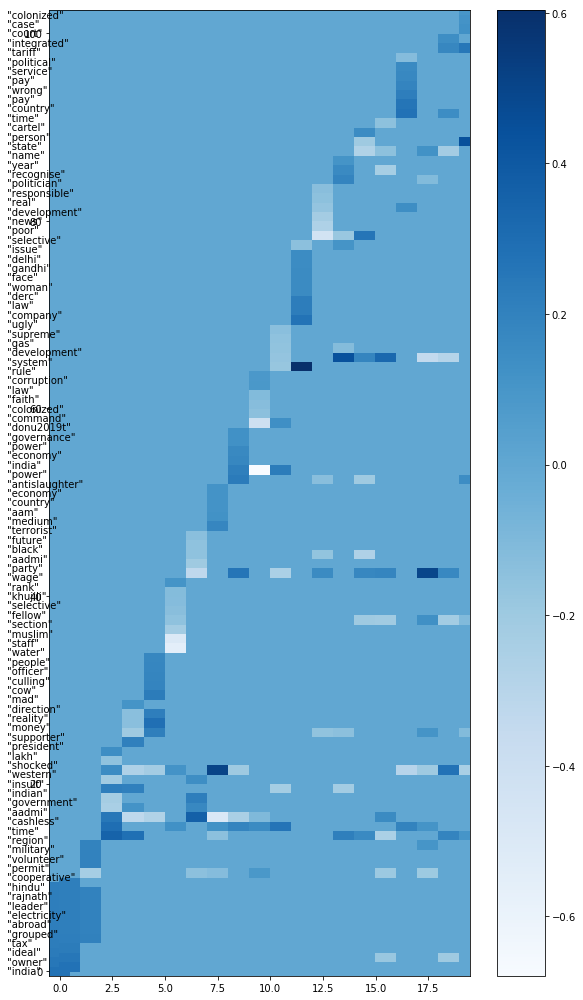

In [100]:
zz=np.resize(zz,(len(DC.keys()),zz.shape[1]))
plt.figure(figsize = (8,14))
plt.pcolor(zz,norm=None, cmap='Blues')
plt.colorbar(cmap='Blues')
plt.imshow(zz, cmap='Blues', interpolation='nearest',aspect='auto')
for val, key in enumerate(DC.keys()):
        plt.text(-2.5, val + 0.5, key,
                 horizontalalignment='left',
                 verticalalignment='top'
                 )
plt.gca().invert_yaxis()      # flip the y-axis so the texts are in the order
plt.tight_layout()            # fixes margins
plt.show()

In [101]:
def topics_to_vectorspace(n_topics, n_words=100):
    rows = []
    for i in xrange(n_topics):
        temp = model.show_topic(i, n_words)
        row = dict(((j[1],j[0]) for j in temp))
        rows.append(row)
    return rows
vec = DictVectorizer()
X = vec.fit_transform(topics_to_vectorspace(K))
X.shape

(20, 1840)

# PCA

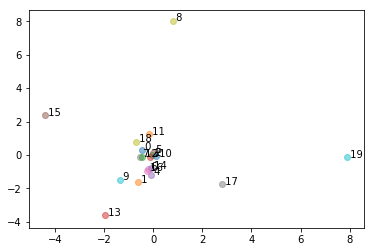

In [102]:
#pca = PCA(n_components=2)
#X_pca = pca.fit(X.toarray()).transform(X.toarray())
#for i in xrange(X_pca.shape[0]):
#    plt.scatter(X_pca[i, 0], X_pca[i, 1], alpha=.5)
#    plt.text(X_pca[i, 0], X_pca[i, 1], s=' ' + str(i))    
#plt.show()

/home/ubuntu/.virtualenvs/nlp/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


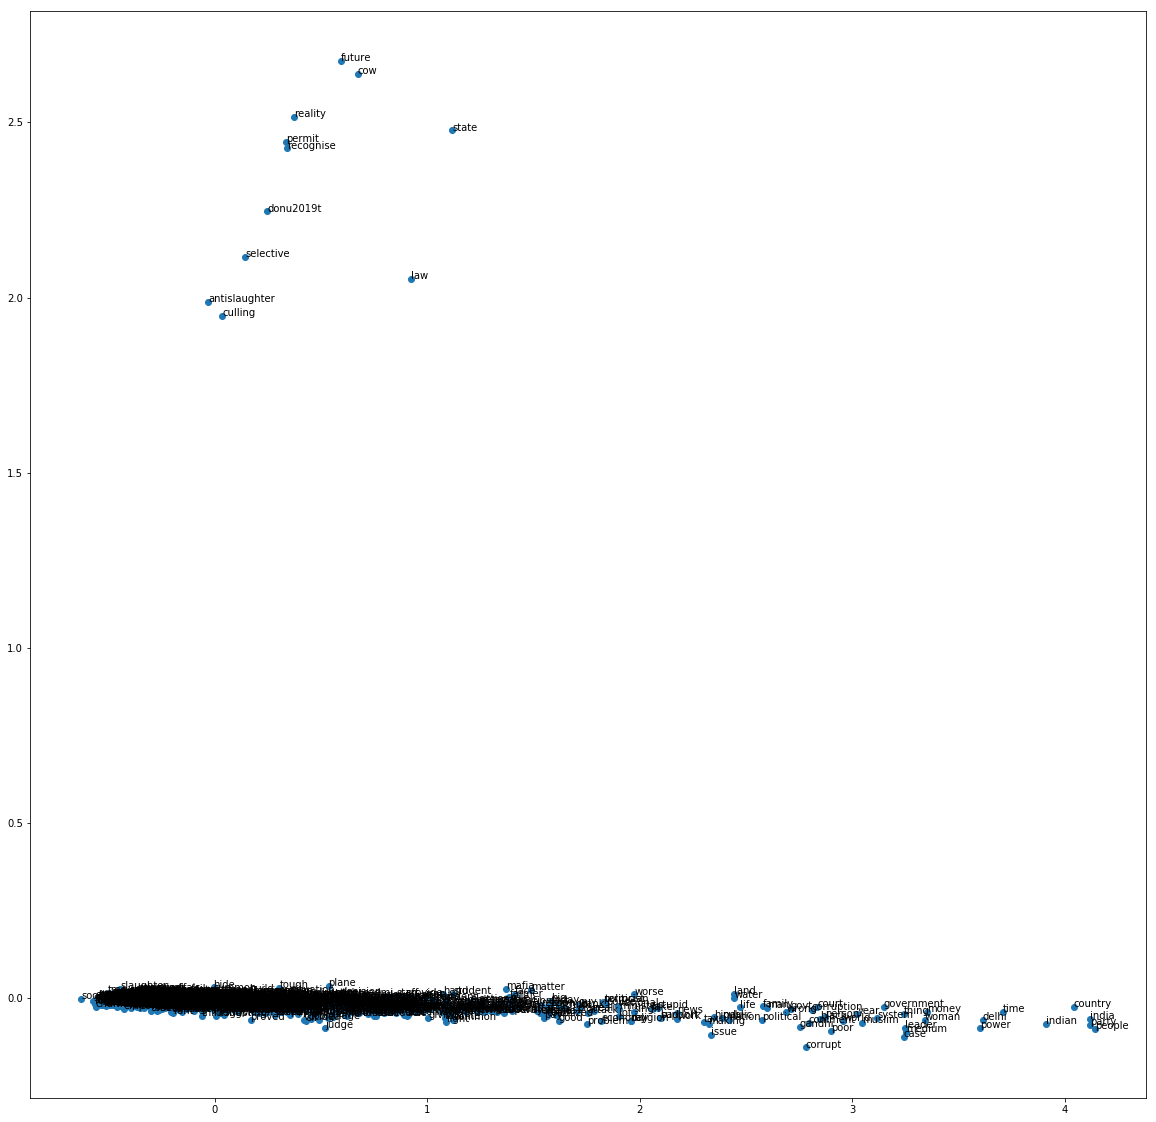

In [103]:
sentences = doc_clean
model = Word2Vec(sentences,workers=3)
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.figure(figsize = (20,20))
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

# <div class="alert alert-block alert-info"><font color='red'> Users with Anonymous profiles (Positive Comments) </font> </div>

In [104]:
doc_complete = []
with open('null_positivecomment.txt') as f:
    for l in f:
        doc_complete.append(l) 

In [105]:
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    stop_free = " ".join([i for i in punc_free.split() if i not in stop_wrd])
    stop_free = ' '.join(i for i in stop_free.split() if not i.startswith('u0'))
    #stop_free = ' '.join(i for i in stop_free.split() if len(i)>3)
    stop_free = " ".join([i for i in stop_free.lower().split() if not unicode(i, 'utf-8').isnumeric()])
    normalized = " ".join(lemma.lemmatize(word) for word in stop_free.split())
    return normalized
doc_clean = [clean(doc).split() for doc in doc_complete]
print(doc_clean[:5])

[[u'latest', u'figure', u'thirty', u'percent', u'muslim', u'percent', u'christian', u'covered', u'obc', u'category', u'separate', u'quota', u'religion', u'basis', u'forbidden', u'minority', u'status', u'allowed', u'run', u'institution', u'higher', u'share', u'management', u'quota', u'allowed', u'institution', u'run', u'jat', u'category', u'quoto', u'poor', u'reserved', u'category', u'provided', u'reservation', u'applicable', u'child', u'family', u'rich', u'reserved', u'category', u'annual', u'income', u'lac', u'property', u'crore', u'denied', u'reservation', u'opportunity', u'contest', u'balance', u'percent', u'seat', u'government', u'tax', u'payer', u'limited', u'resource', u'support', u'financially', u'requirement', u'child', u'understood', u'interest', u'fundamental', u'ideal', u'run', u'country'], [u'real', u'unwanted', u'centre', u'quota', u'needed', u'people', u'centre', u'towing', u'line', u'caste', u'religious', u'compulsion', u'trend', u'centre', u'state', u'reserve', u'quota'

In [106]:
# frequency calculation of token in all documents
frequency = defaultdict(int)
for text in doc_clean:
    for token in text:
        frequency[token] += 1

In [107]:
# make new text data by removing out the token that have occurence less then 2
minimum_freq = 1
len_of_token = 2
# doc_clean = [[token for token in text if frequency[token] > minimum_freq]
#           for text in doc_clean]
doc_clean = [[token for token in text if len(token) > len_of_token and frequency[token] > minimum_freq]
          for text in doc_clean]
# print doc_clean1[17]

In [108]:
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# LDA

In [ ]:
Lda = gensim.models.ldamulticore.LdaMulticore
ldamodel = Lda(doc_term_matrix, num_topics=200, id2word = dictionary, passes=20)

In [ ]:
#top_topics = model.top_topics(corpus, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
#avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
#print('Average topic coherence: %.4f.' % avg_topic_coherence)

#from pprint import pprint
#pprint(top_topics)

In [ ]:
print(ldamodel.print_topics(num_topics=20))

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)

# LSI

In [109]:
model = LsiModel(doc_term_matrix, id2word=dictionary,num_topics=20)  # train model

In [110]:
for c in model.print_topics(200):
     print c

(0, u'0.468*"tripura" + 0.256*"agartala" + 0.196*"india" + 0.195*"class" + 0.192*"world" + 0.187*"state" + 0.170*"city" + 0.150*"international" + 0.145*"hour" + 0.134*"people"')
(1, u'-0.513*"party" + -0.342*"people" + -0.252*"india" + -0.214*"country" + -0.162*"time" + -0.159*"indian" + -0.152*"delhi" + 0.150*"tripura" + -0.132*"political" + -0.129*"good"')
(2, u'0.675*"party" + -0.363*"india" + -0.176*"people" + -0.174*"indian" + -0.171*"land" + -0.163*"country" + 0.105*"delhi" + 0.093*"tripura" + -0.092*"rule" + 0.091*"political"')
(3, u'0.373*"electricity" + 0.341*"rule" + 0.299*"consumer" + 0.286*"court" + 0.190*"act" + 0.177*"ombudsman" + -0.177*"people" + 0.176*"regular" + 0.173*"discoms" + 0.151*"recruitment"')
(4, u'0.675*"country" + -0.294*"india" + -0.212*"land" + 0.137*"corruption" + -0.116*"party" + 0.104*"singapore" + -0.101*"british" + -0.095*"mogul" + -0.089*"kargil" + 0.084*"lee"')
(5, u'0.586*"people" + -0.393*"india" + -0.278*"country" + -0.164*"kargil" + -0.140*"vaj

# Heat Map

In [111]:
K = model.num_topics
columns = []
columns_dict = {}
for k in range(1,K+1):
    columns.append(str(k))
    columns_dict[k-1] = ""

In [112]:
df = pd.DataFrame(columns = columns)
pd.set_option('display.width', 1000)
zz = np.zeros(shape=(1000,K))
last_number=0
DC={}
for x in range (10):
  data = pd.DataFrame(columns_dict,index=[0])
  df=df.append(data,ignore_index=True)  
for line in model.print_topics(num_topics=K):
    tp, w = line
    #print tp
    probs=w.split("+")
    y=0
    for pr in probs:
        a=pr.split("*")
        df.iloc[y,tp] = a[1]       
        if a[1] in DC:
           zz[DC[a[1]]][tp]=a[0]
        else:
           zz[last_number][tp]=a[0]
           DC[a[1]]=last_number
           last_number=last_number+1
        y=y+1

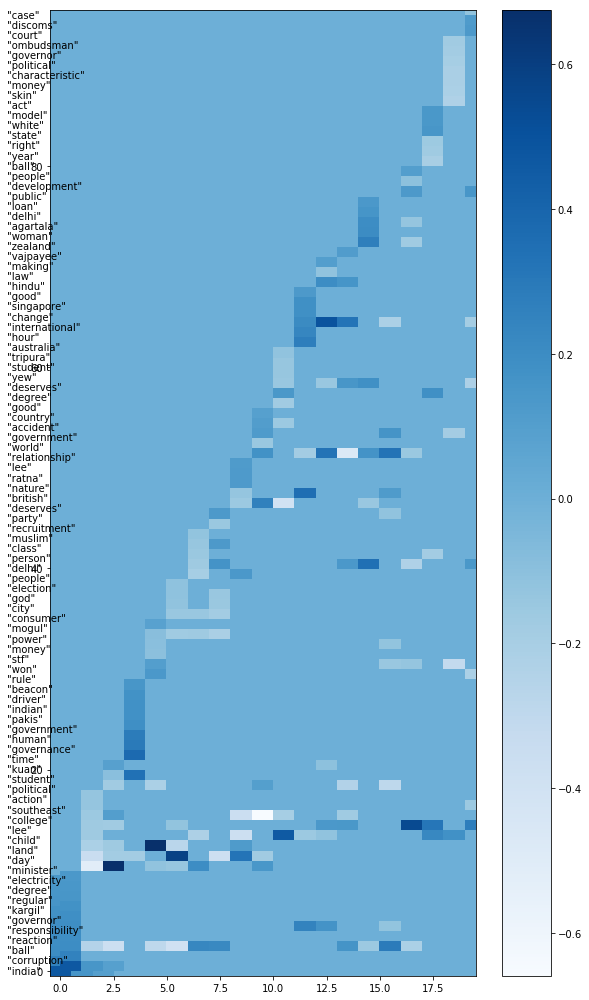

In [113]:
zz=np.resize(zz,(len(DC.keys()),zz.shape[1]))
plt.figure(figsize = (8,14))
plt.pcolor(zz,norm=None, cmap='Blues')
plt.colorbar(cmap='Blues')
plt.imshow(zz, cmap='Blues', interpolation='nearest',aspect='auto')
for val, key in enumerate(DC.keys()):
        plt.text(-2.5, val + 0.5, key,
                 horizontalalignment='left',
                 verticalalignment='top'
                 )
plt.gca().invert_yaxis()      # flip the y-axis so the texts are in the order
plt.tight_layout()            # fixes margins
plt.show()

In [114]:
def topics_to_vectorspace(n_topics, n_words=100):
    rows = []
    for i in xrange(n_topics):
        temp = model.show_topic(i, n_words)
        row = dict(((j[1],j[0]) for j in temp))
        rows.append(row)
    return rows
vec = DictVectorizer()
X = vec.fit_transform(topics_to_vectorspace(K))
X.shape

(20, 1932)

# PCA

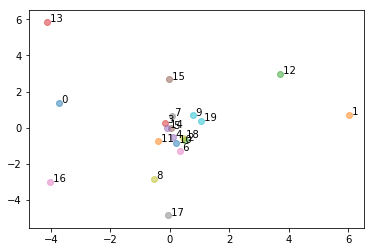

In [115]:
#pca = PCA(n_components=2)
#X_pca = pca.fit(X.toarray()).transform(X.toarray())
#for i in xrange(X_pca.shape[0]):
#    plt.scatter(X_pca[i, 0], X_pca[i, 1], alpha=.5)
#    plt.text(X_pca[i, 0], X_pca[i, 1], s=' ' + str(i))    
#plt.show()

/home/ubuntu/.virtualenvs/nlp/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


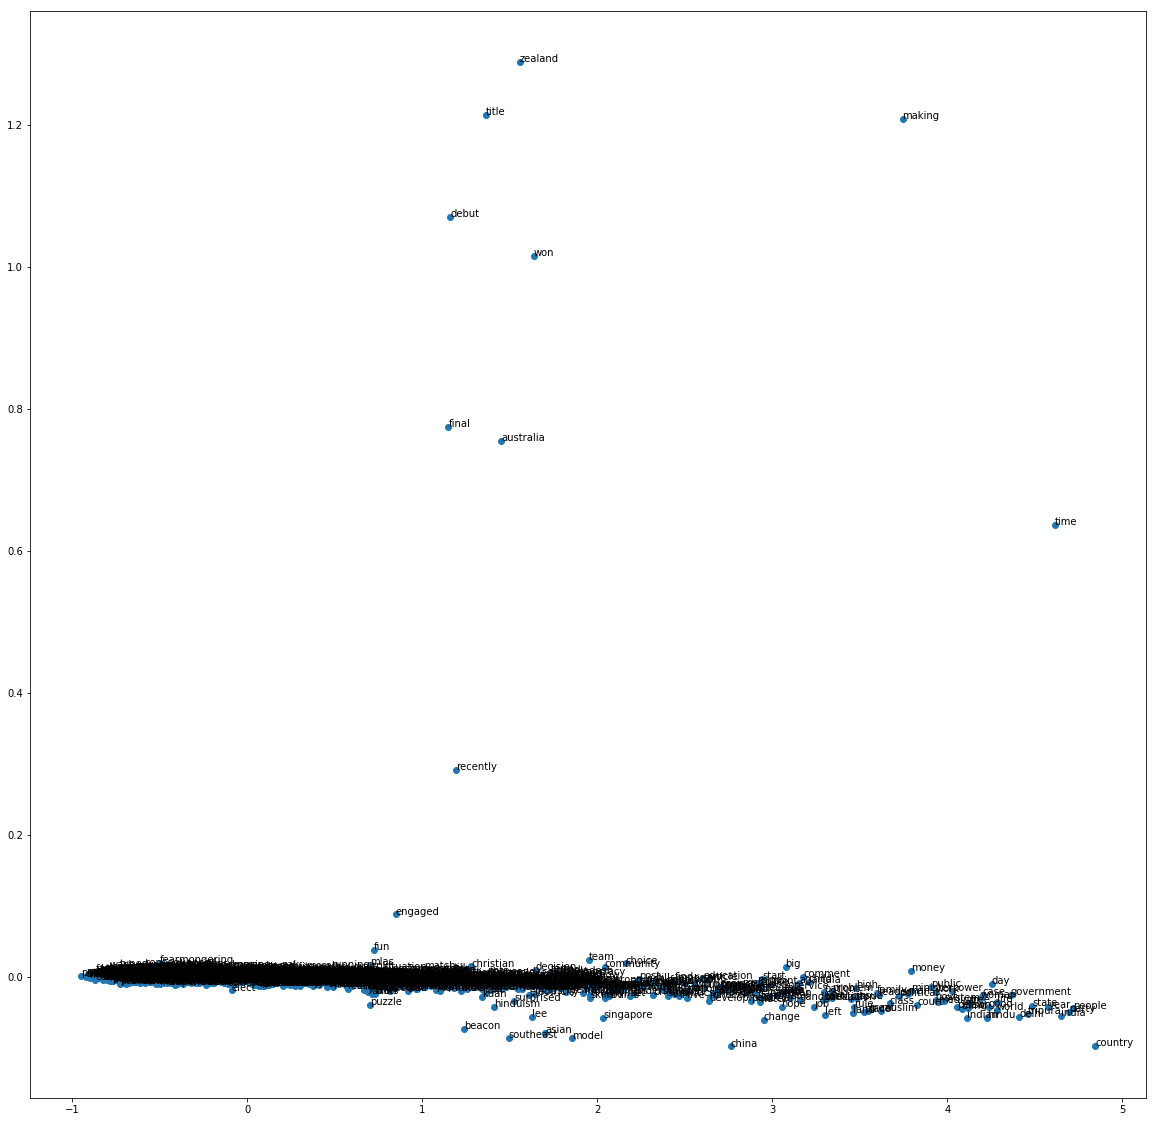

In [116]:
sentences = doc_clean
model = Word2Vec(sentences,workers=3)
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.figure(figsize = (20,20))
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

# <div class="alert alert-block alert-info"> <font color='red'> Users with Anonymous profiles (Neutral Comments) </font> </div>

In [117]:
doc_complete = []
with open('null_neutralcomment.txt') as f:
    for l in f:
        doc_complete.append(l) 

In [118]:
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    stop_free = " ".join([i for i in punc_free.split() if i not in stop_wrd])
    stop_free = ' '.join(i for i in stop_free.split() if not i.startswith('u0'))
    #stop_free = ' '.join(i for i in stop_free.split() if len(i)>3)
    stop_free = " ".join([i for i in stop_free.lower().split() if not unicode(i, 'utf-8').isnumeric()])
    normalized = " ".join(lemma.lemmatize(word) for word in stop_free.split())
    return normalized
doc_clean = [clean(doc).split() for doc in doc_complete]
print(doc_clean[:5])

[[u'politician', u'medium', u'perpetuate', u'caste', u'system'], ['spot', 'enemy', 'midst', 'mingling'], [u'soldier', u'fighter', u'army'], [u'militancy', u'succeeded', u'support', u'local', u'people', u'including', u'police', u'political', u'leader'], [u'unfortunate', u'escape', u'place', u'earlier', u'security', u'force', u'laid', u'cordon', u'hiding', u'terrorist', u'j', u'k', u'hoped', u'traced', u'nuetralised', u'time', u'pak', u'sponsored', u'terrorist', u'launching', u'pad', u'built', u'border', u'smashed', u'forthwith']]


In [119]:
# frequency calculation of token in all documents
frequency = defaultdict(int)
for text in doc_clean:
    for token in text:
        frequency[token] += 1

In [120]:
# make new text data by removing out the token that have occurence less then 2
minimum_freq = 1
len_of_token = 2
# doc_clean = [[token for token in text if frequency[token] > minimum_freq]
#           for text in doc_clean]
doc_clean = [[token for token in text if len(token) > len_of_token and frequency[token] > minimum_freq]
          for text in doc_clean]
# print doc_clean1[17]

In [121]:
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# LDA

In [ ]:
Lda = gensim.models.ldamulticore.LdaMulticore
ldamodel = Lda(doc_term_matrix, num_topics=200, id2word = dictionary, passes=20)

In [ ]:
#top_topics = model.top_topics(corpus, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
#avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
#print('Average topic coherence: %.4f.' % avg_topic_coherence)

#from pprint import pprint
#pprint(top_topics)

In [ ]:
print(ldamodel.print_topics(num_topics=20))

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)

# LSI

In [122]:
model = LsiModel(doc_term_matrix, id2word=dictionary,num_topics=20)  # train model

In [123]:
for c in model.print_topics(200):
     print c

(0, u'-0.380*"police" + -0.380*"day" + -0.379*"case" + -0.377*"hiding" + -0.377*"back" + -0.376*"registered" + -0.376*"figarez" + -0.004*"court" + -0.002*"order" + -0.002*"woman"')
(1, u'-0.290*"sab" + -0.278*"salman" + -0.277*"harami" + -0.277*"kali" + -0.276*"pyali" + -0.276*"wali" + -0.276*"mil" + -0.276*"song" + -0.276*"modiek" + -0.276*"bum"')
(2, u'0.426*"calling" + 0.406*"whatsapp" + 0.406*"feature" + 0.405*"user" + 0.404*"version" + 0.402*"update" + 0.008*"name" + 0.006*"party" + 0.005*"wifi" + 0.003*"window"')
(3, u'0.847*"comment" + 0.370*"email" + 0.160*"add" + 0.159*"address" + 0.158*"subscribe" + 0.158*"notification" + 0.146*"awaiting" + 0.146*"moderation" + 0.030*"deleted" + 0.018*"party"')
(4, u'-0.413*"people" + -0.395*"party" + -0.316*"dhoka" + -0.292*"member" + -0.261*"delhi" + -0.251*"gang" + -0.235*"bangladesh" + -0.232*"reportedly" + -0.231*"underground" + -0.230*"slipped"')
(5, u'-0.360*"member" + 0.342*"people" + -0.320*"gang" + -0.317*"bangladesh" + -0.313*"unde

# Heat Map

In [124]:
K = model.num_topics
columns = []
columns_dict = {}
for k in range(1,K+1):
    columns.append(str(k))
    columns_dict[k-1] = ""

In [125]:
df = pd.DataFrame(columns = columns)
pd.set_option('display.width', 1000)
zz = np.zeros(shape=(1000,K))
last_number=0
DC={}
for x in range (10):
  data = pd.DataFrame(columns_dict,index=[0])
  df=df.append(data,ignore_index=True)  
for line in model.print_topics(num_topics=K):
    tp, w = line
    #print tp
    probs=w.split("+")
    y=0
    for pr in probs:
        a=pr.split("*")
        df.iloc[y,tp] = a[1]       
        if a[1] in DC:
           zz[DC[a[1]]][tp]=a[0]
        else:
           zz[last_number][tp]=a[0]
           DC[a[1]]=last_number
           last_number=last_number+1
        y=y+1

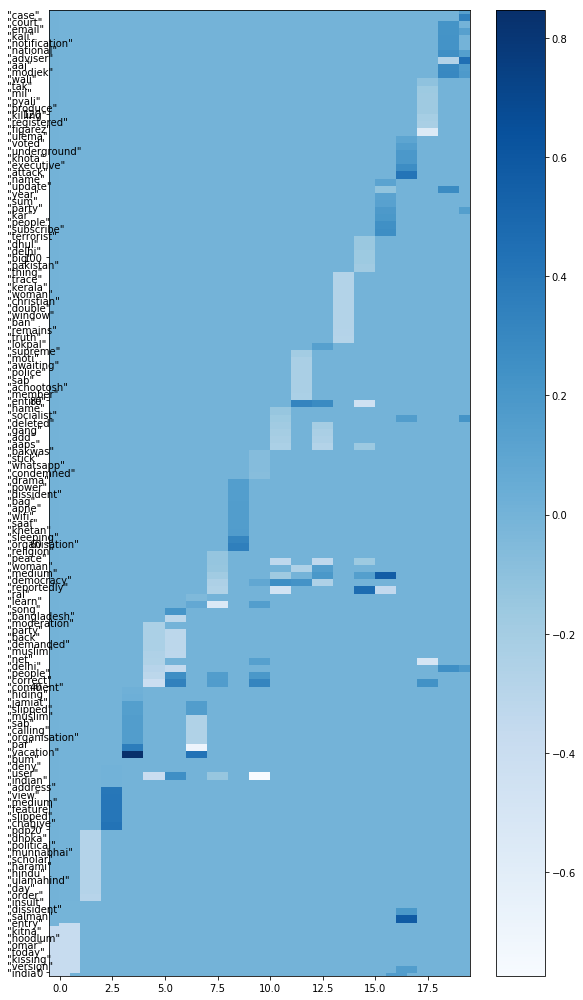

In [126]:
zz=np.resize(zz,(len(DC.keys()),zz.shape[1]))
plt.figure(figsize = (8,14))
plt.pcolor(zz,norm=None, cmap='Blues')
plt.colorbar(cmap='Blues')
plt.imshow(zz, cmap='Blues', interpolation='nearest',aspect='auto')
for val, key in enumerate(DC.keys()):
        plt.text(-2.5, val + 0.5, key,
                 horizontalalignment='left',
                 verticalalignment='top'
                 )
plt.gca().invert_yaxis()      # flip the y-axis so the texts are in the order
plt.tight_layout()            # fixes margins
plt.show()

In [127]:
def topics_to_vectorspace(n_topics, n_words=100):
    rows = []
    for i in xrange(n_topics):
        temp = model.show_topic(i, n_words)
        row = dict(((j[1],j[0]) for j in temp))
        rows.append(row)
    return rows
vec = DictVectorizer()
X = vec.fit_transform(topics_to_vectorspace(K))
X.shape

(20, 1668)

# PCA

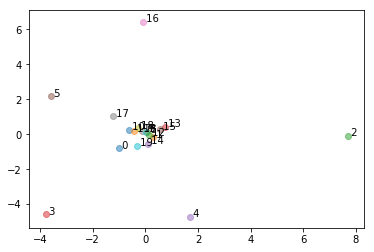

In [128]:
#pca = PCA(n_components=2)
#X_pca = pca.fit(X.toarray()).transform(X.toarray())
#for i in xrange(X_pca.shape[0]):
#    plt.scatter(X_pca[i, 0], X_pca[i, 1], alpha=.5)
#    plt.text(X_pca[i, 0], X_pca[i, 1], s=' ' + str(i))    
#plt.show()

/home/ubuntu/.virtualenvs/nlp/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


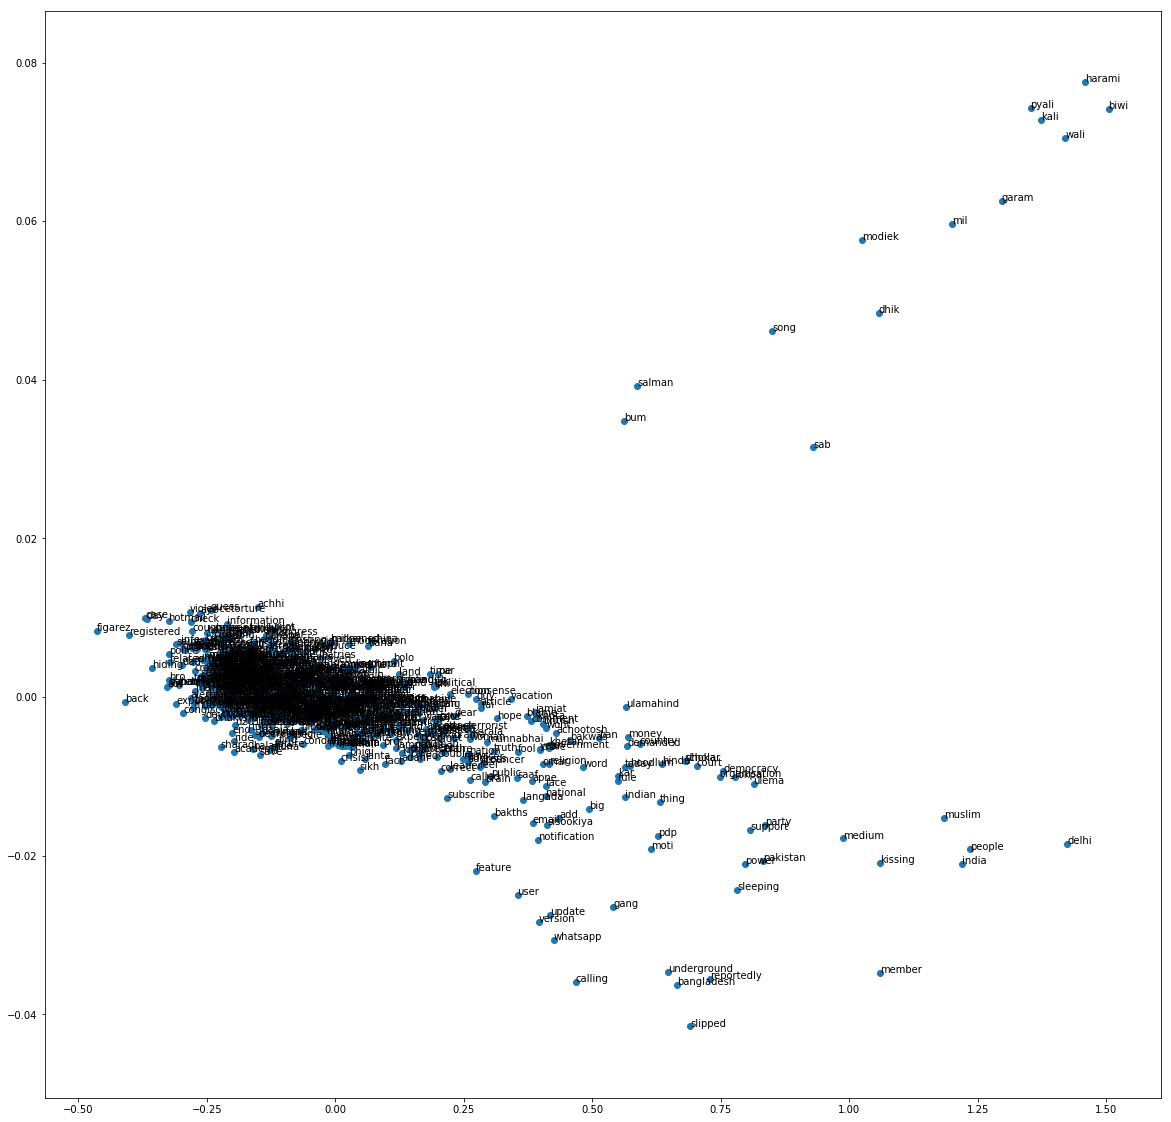

In [129]:
sentences = doc_clean
model = Word2Vec(sentences,workers=3)
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.figure(figsize = (20,20))
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()